# Sistemas Lineares

In [1]:
import numpy as np
from scipy.linalg import solve_triangular
import time
import random

# Métodos diretos 

## Decomposição LU

Dado um sistema $Ax = b$, podemos decompor $A$ em um  matriz triangular inferior $L$ com todos os elementos da diagonal igual a 1 e em uma matriz triangular superior $U$. O objetivo dessa decomposição é simplificar e otimizar o processo de resolução de sistemas lineares, pois existem algoritmos rápidos para resolver sistema triangulares.

$A = LU$

$\left[\begin{array}{c c c c c}
{a_{11}}&  a_{12}&  a_{13}& \cdots& a_{1n}\\ 
a_{21}&  a_{22}&  a_{23}& \cdots& a_{2n}\\
a_{31}&  a_{32}&  a_{33}& \cdots& a_{3n}\\
\vdots& & & & \vdots&\\
a_{n1}&  a_{n2}&  a_{n3}& \cdots& a_{nn}\end{array}\right] =  \left[\begin{array}{c c c c c}
{1}&  &  &  & \\ 
l_{21}&  1& & & \\
l_{31}&  l_{32}&  1& &\\
\vdots& & & \ddots& \\
l_{n1}&  l_{n2}&  l_{n3}& \cdots& 1\end{array}\right] \cdot \left[\begin{array}{c c c c c}{u_{11}}&  u_{12}&  u_{13}& \cdots& u_{1n}\\ 
&  u_{22}&  u_{23}& \cdots& u_{2n}\\
&  &  u_{33}& \cdots& u_{3n}\\
& & & \ddots & \vdots&\\
&  &  & & u_{nn}\end{array}\right]$ 

**Como resolver o sistema:**

$Ax = b \Leftrightarrow LUx = b$

Primeiro chamamos $Ux$ de $y$ ficando com $L\underset{y}{\underbrace{Ux}}= b$, então resolvemos esse o sistema triangular inferior $Ly=b$.

Depois de encontrar o $y$ e resolvemos o sistema triangular superior $Ux = y$, assim encontramos o resultado do sistema $Ax=b$ de forma mais simples.

**Cálculo da $L$ e $U$**

Calcular a primeira linha de $U$ é trivial, pois ao multiplicar a primeira linha de $L = [1,0,0...]$ pela primeira coluna de $U = [u_{11},0,0...]^T$ o resultado é $u_{11}$, generalizando , para $a_{1j} = u_{1j}\cdot 1 + u_{2j}\cdot0+...$, assim podemos afirmar que $u_{1j} = a_{1j}$

A primeira coluna de $L$ também é simples, ao calcular $a_{i1}$ obtemos que $a_{i1} = l_{i1} \cdot u_{11} + l_{i2} \cdot0 +l_{i3} \cdot0+...$, para $i = 2,3,..$, ou seja, $l_{i1} = a_{i1}/u_{11}$

Continuando o processo conseguimos obter um **termo geral** para $L$ e $U$, então para conseguir qualquer valor de $U$ e $L$ só utilizar as fórmulas abaixo:

- $u_{ij} = a_{ij} - \sum _{k=1}^{i-1}l_{ik}u_{kj}$


- $l_{ij} = \frac{a_{ij} - \sum _{k=1}^{j-1}l_{ik}u_{kj}}{u_{jj}}$

**Obs:** Primeiro calcula uma linha de $U$ depois uma coluna de $L$, pois eles são dependentes.

### Mais informações sobre LU
 
#### Menores Principais

- Se $A$ possui todos os menores principais não-singulares, isto é, $det(A_{k})\neq 0, k=1,…,n-1$ podemos garantir que existem uma única $L$ e uma única $U$, tal que $A = LU$ onde $A_{1} = a_{11}, A_{2} = \begin{bmatrix} 
 a_{11}& a_{12} \\ 
 a_{21}& a_{12} 
\end{bmatrix},...$

- Se $A$ possui o último menor principal $\neq0$, isto é, $det(A_{n})\neq 0$ podemos garantir que o sistema linear tem apenas uma solução


#### Propriedades

Uma outra aplicação de $LU$ é para cálculo de determinante.

Sendo $A=LU$, aplicamos deteterminante dos dois lados $det(A) = det(LU)\Rightarrow det(A) = det(L)det(U)$, como determinante de uma matriz triangular é a multiplicação dos elementos da diagonal da matriz ficamos com $det(A) = \underset{1}{\underbrace{det(L)}}det(U$).

Assim, para calcular o determinante de $A$ é só multiplicar os elementos da diagonal da matriz $U$.






In [2]:
def solve_upper(U, y): 
    """ Resolve um sistema triangular superior Ax=b
    
    Args:
        A: Matriz triangular superior
        b: Vetor 
    Retorno:
        vetor solução x
    """
    n = np.shape(y)[0]
    x = np.zeros(n)

    for i in np.arange(n-1,-1,-1): # limite superior:último índice (menor) -1:-1 (step é decremento) --> 4:2:-1 percorre 4 e 3.
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x
    


def solve_lower(L, b):
    """ Resolve um sistema triangular inferior Ax=b
    
    Args:
        A: Matriz triangular inferior
        b: Vetor 
    Retorno:
        vetor solução x
    """
    
    n = np.shape(b)[0]
    z = np.zeros(n)

    for i in np.arange(n):
        z[i] = (b[i]-L[i,0:i].dot(z[0:i]))/L[i,i] #z[np.arange(i)] --> percorre até i-1

    return z
        
 

In [3]:
def lu_decomp(A):
    """ Decompões uma matriz A em uma matriz triangular inferior L e uma superior U
    
    Args:
        A: Matriz
    Retorno:
        L,U
    """
    
    n = np.shape(A)[0]
    
    #cria uma matriz identidade de tamanho n
    L = np.eye(n)
    
    #cria uma matriz zerada de tamanho n
    U = np.zeros((n,n))
    
    for k  in np.arange(n):
        
        #calcula linha de U
        for j in np.arange(k,n):
            U[k,j]=A[k,j]-np.dot(L[k,:k],U[:k,j])
            
        #calcula coluna de L
        for i in np.arange(k+1,n):
            L[i,k]=A[i,k]-np.dot(L[i,:k],U[:k,k])
            L[i,k]=L[i,k]/U[k,k]
    
    return L, U
              

def solve_lu_decomp(A,b): 
    """ Resolve um sistema linear Ax=b utilizando decomposição LU
    
    Args:
        A: Matriz
        b: Vetor 
    Retorno:
        vetor solução x 

    
    """
    
    L,U = lu_decomp(A) 
    # Resolve o sistema triangular Ly = b
    y = solve_lower(L, b)
    # Resolve o sistema triangular Ux = y
    x = solve_upper(U, y)
   
   
    return x
                      

In [4]:
A = np.array([[-1,2,-2,1], [-2,2,-3,0], [-2,0,-1,-3], [-2,0,0,-2]])
b = np.array([1,1,1,1])

L, U = lu_decomp(A)

if((L@U == A).all()):
    print("A decomposição ocorreu corretamente\n")
    
x = solve_lu_decomp(A,b)

print(x,np.linalg.solve(A,b))

if((x ==np.linalg.solve(A,b)).all()):
    print("\nA resposta calculada é igual a do python")


A decomposição ocorreu corretamente

[-0.    1.25  0.5  -0.5 ] [-0.    1.25  0.5  -0.5 ]

A resposta calculada é igual a do python


## Decomposição de Cholesky

A decomposição de Cholesky é uma forma de decompor $A$ que também facilita a resolução de sistema lineares, mas ela so funciona se a matriz for simétrica positiva definida.

### Matiz Simétrica Positiva Definida (SPD)

Uma matriz simétrica $A \in \mathcal{M}_{n,n} (A = A^{T})$ é dita simétrica positiva
definida (SPD), se $x^{T} \cdot Ax > 0$, para todo vetor não-nulo $v\in \mathbb{R}^{n}$.

Para testar se a matriz simétrica $A$ é SPD podemos checar os testes abaixo, se um deles estiver sendo garantido então podemos afirmar que é SPD:

1) $det(A_{k})>0,k=1,2,...,n$; \
2) todos os autovalores de $A$ são positivos 

**Demonstração**

Para provar isso podemos pegar por exemplo uma matriz diagonal e fazer a operação $x^{t} \cdot Dx$, o resultado será $a_{11}x_{1}^{2} + a_{22}x_{2}^{2} + a_{33}x_{3}^{2}+...+a_{nn}x_{n}^{2}$

Então se eu tenho um $a_{i}<0$ e um vetor $x$ que todos os elementos são 0, exceto a o $x_{i}$ que é 1, ao fazer o somatório ficamos com $\sum_{i=1}^{n}{a_{i}x_{i}^{2}} =  a_{i} < 0$.<br>

Para ser SPD sabemos que $x^{T} \cdot Ax$ tem que ser maior que $0$, então para que isso aconteça todos os $a_{i}$ precisam ser maiores que 0, porque se um não for vai existir um $x_{i}$ que não torna isso verdade como mostrado no exemplo acima. 

Então concluimos que se $A$ é diagonal e SPD $\Rightarrow a_{i}>0$

Agora pensando em uma matriz genérica $A$, primeiro diagonalizamos ela ficando com $P^{-1}DP$, escolhendo uma $P$ ortogonal podemos escrever como $P^{T}DP$, substituindo na equação $x^{T}Ax$ ficamos com  $x^{T}Ax = \underset{(Px)^{T}}{\underbrace{x^{T}P^{T}}}DPx$, chamando $Px$ de $y$ ficamos com $y^{T}Dy$.

Então podemos afirmar que $x^{T}Ax >0 \Leftrightarrow y^{T}Dy >0$, e sabemos que para a expressão $y^{T}Dy$ ser maior que 0 somente se os $d_{i}>0$. Como diagonalizamos a $A$ sabemos que os $d_{i}$ são os autovalores de $A$, então para que a matriz $A$ seja $SPD$ é necessário que todos os autovalores da mesma sejam positivos, como queríamos demonstrar.

Como o determinante é o produto dos autovalores e os autovalores precisam ser maiores que 0 para ser SPD, então o determinante também precisa ser maior que 0 para ser SPD.

### Método

Sendo SPD podemos utilizar a decomposição de Cholesky, que é mais eficiente que a decomposição $LU$ e consome menos memória. Vamos decompor a matriz $A$ em $A = H \cdot H^{T}$, sendo $H$ uma matriz triangular inferior com os elementos da diagonal $>0$

$H = \left[\begin{array}{c c c c c}
{h_{11}}& &  & & \\ 
h_{21}&  h_{22}& & & \\
h_{31}&  h_{32}&  h_{33}& & \\
\vdots& \vdots& \vdots& \ddots& &\\
h_{n1}&  h_{n2}&  h_{n3}& \cdots& h_{nn}\end{array}\right]$


**Cáculo da H**

Podemos definir em dois cenário, para diagonal e para fora da diagonal.

1) Para diagonal 

- Sabemos que  ao multiplicar as matrizes ficamos com a expressão $a_{ii} = \sum_{k=1}^i h_{ik}(h_{ki})^T$, como $(h_{ki})^T = h_{ik}$ ficamos com $a_{ii} = \sum_{k=1}^i h_{ik}^2$, tirando do somatório quando $k=i$ temos a equação $a_{ii} = \sum_{k=1}^{i-1} h_{ik}^2 + h_{ii}^2$ 

- Isolando $h_{ii}$ ficamos com o termo geral abaixo:

$\begin{cases}
h_{11} = \sqrt{a_{11}},\\
h_{ii} = (a_{ii} - \sum_{k=1}^{j-1}{h_{ik}^{2}})^{1/2} 
\end{cases}$<br><br>

2) Fora da diagonal

- Sabemos que  ao multiplicar as matrizes ficamos com a expressão $a_{ij} = \sum_{k=1}^j h_{ik}h_{jk}$, tirando quando o $k=j$ do somatório ficamos com $a_{ij} = \sum_{k=1}^{j-1} h_{ik}{hjk}+ h_{ij}h_{jj}$

- Isolando $h_{ij}$ ficamos com o termo geral abaixo:

$\begin{cases}h_{i1} = \frac{a_{i1}}{h_{11}}, i = 2,3,...,n , \\
h_{ij} = \frac{(a_{ij}- \sum_{k=1}^{j-1}{h_{ik}h_{jk}})}{h_{jj}}, 2 \leq j < i \end{cases}$
<br><br>
**Como resolver o sistema:**

Para resolver o sistema é da mesma forma que é feita com $LU$, mas agora com a decomposição $A = H\cdot H^{T}$.

Primeiro chamamos $H^{T}x$ de $y$ ficando com $H\underset{y}{\underbrace{H^{T}x}}= b$, então resolvemos esse o sistema triangular inferior $Hy=b$.

Depois de encontrar o $y$ e resolvemos o sistema triangular superior $H^{T}x = y$, assim encontramos o resultado do sistema $Ax=b$ de forma mais simples.


In [5]:
def cholesky(A):
    """ Decompõe uma matriz A em uma matriz triangular inferior H e uma H transposta
    
    Args:
        A: Matriz
    Retorno:
        H: Matriz triangular 
    """
    n = len(A)
    
    H = np.zeros((n, n))
    
    H[0, 0] = np.sqrt(A[0, 0])
    
    for i in range(1, n):
        for j in range(0, i+1):
            sum_ = 0
            sum_+= np.dot(H[i,:j],H[j,:j])
           
                
            # calcula elemento da diagonal
            if i == j:           
                H[i, i] = np.sqrt(A[i, i] - sum_)
            # calcula elemento fora da diagonal
            else:
                H[i, j] = (A[i, j] - sum_)/H[j, j]
    
    return H


def solve_cholesky(A, b):
    """ Resolve um sistema linear Ax=b utilizando decomposição de cholesky
    
    Args:
        A: Matriz
        b: Vetor 
    Retorno:
        vetor solução x
    """
    
    H = cholesky(A)
    
    # Resolve o sistema triangular Hy = b
    y = solve_lower(H, b)
    # Resolve o sistema triangular Htx = y
    x = solve_upper(H.transpose(), y)
    
    return x

In [6]:
def gram_schmidt(vectors):
    """Aplica o processo de ortogonalização de Gram-Schmidt 
    a um conjunto S de vetores
    
    Args:
        vectors: conjunto S de vetores
    Retorno:
        conjunto ortonormal de vetores
    """
    basis = []
    
    for v in vectors:
        w = v - sum(np.dot(v,b)*b for b in basis)
        
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    
    return np.array(basis)

def generate_sim_matrix(n):
    """ Gera uma matriz simétrica nxn
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz simétrica
    """
    A = np.random.rand(n,n)
    return A@A.T

def generate_spd_matrix(n):
    """ Gera uma matriz simétrica positiva definida e diagonal dominante
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz spd diagonal dominante
    """

    Q = np.random.rand(n,n)
    D = random.sample(range(1, n+1), n)
    D = np.diag(D)

    for i in range(n):
        Q[i, i] = sum(np.abs(Q[:, 1])) + 5

    Q = gram_schmidt(Q.T)

    return Q.T @ D @ Q

In [7]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

H = cholesky(A)


if((H@H.transpose() - A).all()<1e-10):
    print("A decomposição ocorreu corretamente\n")
    
x = solve_cholesky(A,b)

print(np.round(x,8),np.linalg.solve(A,b))

if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima do python")

A decomposição ocorreu corretamente

[0.56263125 0.5122704  0.63777254 3.77449021] [0.56263125 0.5122704  0.63777254 3.77449021]

A resposta calculada é muito próxima do python


## Eliminação Gaussiana

A eliminação de gauss tem o objetivo de transformar um sistema linear complicado em um equivalente fácil de resolver por exemplo um triangular, preservando o determinante.

###  Relembrando conceitos

#### Sistemas Lineares equivalentes
- Dois sistemas são ditos equivalentes se possuem a mesma solução
- Se um sistema linear é obtido partir de outro sistema através de uma sequência finita de operações elementares, eles são equivalentes

#### Operações Elementares
  
  Denotando $L_{i}$ a $i$-ésima linha de um sistema linear, temos 3 operações elementares:
  
  1. Trocar duas linhas no sistema: $L_{i}\leftrightarrow L_{j}$
  2. Multiplicar uma linha por um escalar $\lambda \neq 0: L_{i}\leftarrow \lambda L_{i}$
  3. Somar a uma linha um múltiplo de uma outra linha: $L_{i}\leftarrow L_{i}+\lambda L_{j}$
     
  Dessas três operações apenas a $3^{o}$ preserva o determinante:
     
     **Prova**:
     Dada as matrizes $A$ e $\bar{A}$\
     \
     $A = \begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix} \bar{A} =\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}+\lambda l_{j}\\...\end{bmatrix}$
     
     $det(\bar{A}) = det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}+\lambda l_{j}\\...\end{bmatrix}\right )
 =  det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix}\right )+ \lambda det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}\\...\end{bmatrix}\right) = det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix}\right ) + \lambda 0 = det(A) $
 


###  Método

Para resolver o sistema de $Ax = b$, usamos a matriz aumentada $[A|b]$ e aplicamos os seguintes passos:

Dada a matriz aumentada $$[A|b] =\left[\begin{array}{c c c c c|c}\color{red}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ a_{21}&  a_{22}&  a_{23}& ...& a_{2n}& b_{2}\\ a_{31}&  a_{32}&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ a_{n1}&  a_{n2}&  a_{n3}& ...& a_{nn}& b_{n}\end{array}\right]$$

1) Escolhe um pivô arbitrário, nesse caso $a_{11}$\
2) Zerar todos os valores abaixo do pivô

Para isso vamos usar a $3^{o}$ operação $L_{2}\leftarrow L_{2}+ m_{21} L_{1}$, para zerar o primeiro elemento de $L_{2}$, que é nosso objetivo,precisamos encontrar um $m_{21}$ que multiplicado por $a_{11}$ e somado a $a_{21}$ dê zero, ou seja, $a_{11}\cdot m_{21} +a_{21} = 0$, isolando o $m$ obtemos que $m_{21} = -a_{21}/a_{11}$<br>

Lembrando que tem que alterar todos os valores da linha que está sendo modificada incluindo os elementos de b.

Ao fazer esse mesmo procedimento para todas as outras linhas $L_{i}\leftarrow L_{i}+ m_{i1} L_{1}$, onde $i=(2,3,...,n)$ com $m_{i1} = -a_{i1}/a_{11}$, zeramos todos os elementos abaixo do pivô.

3) Escolhe um novo pivô e faz o mesmo procedimento agora visando zerar os elementos da  $2^{a}$ coluna<br><br>

$$[A|b] = \left[\begin{array}{c c c c c|c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}& b_{2}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}& b_{n}\end{array}\right]$$<br><br>


Fazendo $L_{i}\leftarrow L_{i}+ m_{i2} L_{2}$, onde $i=(3,4,...,n)$ com $m_{i2} = -a_{i2}/a_{22}$, zeramos os elementos da $2^{a}$ coluna.

4) Vamos fazer esse procedimento até $L_{i}\leftarrow L_{i}+ m_{i,n-1} L_{n-1}$, onde $i=(3,4,...,n)$ com $m_{i,n-1} = -a_{i,n-1}/a_{n-1,n-1}$
<br><br>
$$[A|b] =\left[\begin{array}{c c c c c|c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ 0& {a_{22}}&  a_{23}& ...& a_{2n}& b_{2}\\ 0&  0&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ 0&  0&  0& ...& a_{nn}& b_{n}\end{array}\right]$$
<br><br>
5) O resultado final é um sistema triangular e é só fazer as substituições e encontrar os resultados desse sistema

### Eliminação de Gauss e LU

#### Foma Matricial

Podemos representar as operações usadas no método de gauss de forma matricial para resolver uma equação $Ax = b$

#### Passo a passo:

1) Anular todos os elementos abaixo do pivô, multiplicando os dois lados da expressão $Ax = b$ por nossa $M_{1}$, matriz que contem os $m$ utilizados para zerar os elementos da primeira coluna, tendo agora uma $A_{1}$ que tem todos os elementos abaixo do pivô iguais a 0<br><br> 

$M_{1} A x = M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ m_{21}&  1&  & & \\ m_{31}&  &  1& &\\ \vdots& & & \ddots& \\ m_{n1}&  &  & & 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}\color{red}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1n}\\ a_{21}&  a_{22}&  a_{23}& ...& a_{2n}\\ a_{31}&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ a_{n1}&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{1}b$ 
<br><br>
2) Anular todos os elementos abaixo do pivô, agora temos a expressão $A_{1}x = M_{1}b$, ao multiplicar $M_{2}$ por toda da expressão geramos uma $A_{2}$ com os elementos zerados <br><br>

$M_{2}A_{1}x = M_{2}M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ &  1&  & & \\ &  m_{32}&  1& &\\ & \vdots& & \ddots& \\ &  m_{n2}&  & & 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{2}M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0& {a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots \\ 0&  0&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{2}M_{1}b$
<br><br>
3) Faz o mesmo procedimento para todas as colunas até chegar no pivo $a_{n-1,n-1}$ gerando nossa matriz triangular inferior que utilizamos para resolver o sistema de forma simples<br><br>

$M_{n-1}A_{n-1}x = M_{n-1}...M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ &  1&  & & \\ &  &  1& &\\ & & & \ddots& \\ &  &  & m_{n,n-1}& 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& a_{n,n-1}& a_{nn}\end{array}\right]\cdot x = M_{n-1}...M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& 0& a_{nn}\end{array}\right]\cdot x = M_{n-1}...M_{1}b$<br><br>

**Gauss para $LU$**<br><br>
Ao finalizar o processo percebemos que conseguimos fazer a fatoração $LU$ justamente utilizando a eliminação de gauss, nossa $U$ neste caso é justamente a nossa matriz triangular final 

$$U = \left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& 0& a_{nn}\end{array}\right]$$<br>

Para achar a $L$ é um pouco mais indireto mas sabemos que $A_{n-1}x = M_{n-1}...M_{1}b$ e que $A_{n-1} = U$, então podemos afirmar que $Ux = M_{n-1}...M_{1}b$ como $LUx = b$ podemos dizer que $L = (M_{n-1}...M_{1})^{-1} \Leftrightarrow L = M^{-1}_{1}M^{-1}_{2}...M^{-1}_{n-1}$, ou seja: <br>

$$L = \left[\begin{array}{c c c c c}1&  &  & & \\ -m_{21}&  1&  & & \\ -m_{31}& -m_{32}&  1& &\\ \vdots& \vdots& \vdots& \ddots& \\ -m_{n,1}& -m_{n,2} & -m_{n,3} & -m_{n,n-1}& 1\end{array}\right]$$

In [8]:
def gaussian_elimination(A, b): 
    """ Faz o processo de eliminação de gauss transfomando Ax=b em um sistema linear triangular
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        A: Nova matriz A triangular
        b: Novo vetor b
        M: matriz com todos o m
    """
    
    A = A.copy()
    b = b.copy()
    
    n = len(A)
    
    # M é matriz identidade inicialmente
    M = np.eye(n)
    
    for i in range(n):
        # escolhe o pivo
        pivot = A[i, i]
        
        if(pivot==0):
            print('O sistema precisa ser resolvido com pivoteamento parcial')
            
        for k in range(i+1, n):
            
            #calcula o m que zera o elemento desejado
            m = A[k, i]/pivot

            A[k] = A[k] - A[i]*m
            b[k] = b[k] - b[i]*m
            M[k,i] = m 
    
    return A, b, M

In [9]:
def solve_gauss(A, b):
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    A, b, M = gaussian_elimination(A, b)

    # calcula o sistema triangular superior
    return solve_upper(A,b)

In [10]:
def solve_lu_gauss(A, b):
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss junto com LU
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    
    bo = b.copy()
    
    U,b,L = gaussian_elimination(A,b)
    
    y = solve_lower(L,bo)
    x = solve_upper(U,y)
    
    return x

In [11]:
# Todos os métodos vistos até agora dão aproximadamente o mesmo valor
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)
print(f'Python:{np.linalg.solve(A,b)}\n')
print(f'LU:{np.round(solve_lu_decomp(A,b),8)}\n')
print(f'Eliminação de Gauss:{np.round(solve_gauss(A,b),8)}\n')
print(f'Gauss + LU:{np.round(solve_lu_gauss(A,b),8)}\n')
print(f'Cholesky: {np.round(solve_cholesky(A,b),8)}\n')


Python:[0.38976012 1.84469878 2.72851938 0.38619378]

LU:[0.38976012 1.84469878 2.72851938 0.38619378]

Eliminação de Gauss:[0.38976012 1.84469878 2.72851938 0.38619378]

Gauss + LU:[0.38976012 1.84469878 2.72851938 0.38619378]

Cholesky: [0.38976012 1.84469878 2.72851938 0.38619378]



### Pivô igual ou próximo de 0

Quando o pivô é 0 não podemos utilizar o método de gauss para calcular os $m_{ij}$, pois para os encontrar nós fazemos uma divisão pelo pivô e ai teríamos uma divisão por 0.

No caso de ser próximo ao 0 também ocorrem problemas de aproximação e o resultado pode ficar errado.

Por isso o método da eliminação de gauss precisa ser adaptado, para que ele funcione fazemos um procedimento chamado pivoteamento parcial.

#### Pivoteamento parcial

Vamos utilizar o pivoteamento de linha, ou parcial. Existe um pivoteamento total que leva em conta linhas e colunas mas é muito custoso computacionalmente.

**Método**<br>
Para cada passo $k$ ao invés de escolher um pivô arbitrário, escolhe para ser o pivô o maior elemento da coluna em módulo. Ao encontrar permuta a linha que contêm esse maior elemento com a linha $k$, depois só fazer o método de eliminação de gauss demonstrado anteriormente.

Para permutar as linhas pela forma matricial é so fazer $P\cdot A$. O $P$ será justamente a matriz identidade com as linhas referentes permutadas. Por exemplo, se quero permutar na minha matriz $A$ a linha $i$ com a linha $j$ só pegar a matriz identidade permutar a linha $i$ com a linha $j$ e multiplicar pela $A$.

#### Decomposição LU

Caso um dos menores pricipais seja singular, não podemos fazer a decomposição $LU$ da forma normal, então fazemos da seguinte forma: 

$$P \cdot A = L \cdot U$$ onde P é a matriz de permutações.

**Como resolver o sistema:**
Sabemos que $Ax = B \Leftrightarrow (LU)x = (PA)x = Pb$

1) Resolver $Ly = Pb$ encontrando o valor de $y$\
2) Resolver $Ux = y$ 

Para achar $U$ pode ser feita da mesma forma sem o pivoteamento então $U$ é justamente a matriz triangular resultante da eliminação de gauss.

Para $L$ é um pouco diferente, vale lembrar que a $U$ sem o pivoteamento parcial $U = M_{n-1}...M_{2}M_{1}A$, já com o pivoteamento multiplicamos cada etapa pela permutação necessária então fica  $U = M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1}A$.

Isolando $A$ podemos deixar a expressão da forma $A = (M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}U$, ao multiplicar $P$, sendo $P$ a composição de todas as permutações que foram feitas, dos dois lados chegamos na forma $AP = P(M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}U$. Já que $PA = LU$, podemos afirmar que $L = P(M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}$



In [12]:
def gauss_pivot(A,b):
    """ Faz o processo de eliminação de gauss transfomando Ax=b em um sistema linear triangular
        utilizando o método de pivoteamento parcial
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        A: Nova matriz A triangular
        b: Novo vetor b

    """
    
    n = np.shape(A)[0]
    A = A.copy()
    b = b.copy()

    for k in range(n-1):
        
        maxindex = abs(A[k:,k]).argmax() + k
   
        #Swap rows
        if maxindex != k:
            A[[k,maxindex]] = A[[maxindex, k]]
            b[[k,maxindex]] = b[[maxindex, k]]
        
        #encontra a linha onde tem o maior eleento da coluna para ser o pivo
     
        #faz a eliminação de gauss 
        for i in range(k+1,n):
            m = -A[i,k]/A[k,k]
            A[i,k:n] = A[i,k:n] + m*A[k,k:n]
            b[i] = b[i] + m*b[k]

    return A,b

def solve_gauss_pivot(A, b):
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss com pivoteamento parcial
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    
    A, b = gauss_pivot(A, b)
    # calcula o sistema triangular superior
    return solve_upper(A,b)



In [13]:
A = np.array([[0,2,-2,1], [-2,2,-3,0], [-2,0,-1,-3], [-2,0,0,-2]])
b = np.array([1,1,1,1])
b1 = b.copy()
A1 = A.copy()


x = solve_gauss_pivot(A,b)

print(x,np.linalg.solve(A1,b1))


[-0.    1.25  0.5  -0.5 ] [-0.    1.25  0.5  -0.5 ]


# Métodos iterativos

Se tiver alguma limitação computacional para usar um método numérico, por exemplo não ter memória suficiente ou é uma matriz muito esparsa, devemos usar os métodos iterativos.

## Conceitos

Dados um sistema $Ax = b$, a ideia do método iterativo é partir de um chute inicial $x^{(0)}$ em $\mathbb{R}^{n}$ chegar iterativamente em um $x^{(k)}$ que convirga para o $x$ correto, onde $k$ simboliza o número da iteração. Formalmente:

Podemos dizer que uma sequência de vetores { $x^{(0)},x^{(1)},...,x^{(k)}$ } converge para um vetor $x$, se: 
$\lim_{x \to\infty}\left \| x^{(k)}- x \right \|= 0$


**Para todos os métodos o ideia é semelhante:**

1) É preciso transformar o sistema $Ax = b$ em um sistema equivalente

$$x = Cx + g,$$ em que $C \in \mathcal{M}(n,n)$ e $g\in\mathbb{R}^{n}$ são conhecidos.

Para isso, por exemplo, podemos dizer que $C = I - A$ e $g = b$, substituindo na equação $x = Cx + g$ temos $x = (I-A)x + b \Leftrightarrow x = Ix - Ax +b \Leftrightarrow x = x - Ax +b  \Leftrightarrow Ax = b$ 


2) Dado um $x^{(0)}$, obtemos a sequência {$x^{(0)}, x^{(1)},...$} através do método iterativo, ou seja, a partir de um chute inicial $x^{(0)}$ consiguiremos todos os outros:

$$x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$$

### Convergência 

#### Critério geral de convergência 

Seja { $x^{(0)},x^{(1)},...,x^{(k)}$ } sequência gerada pelo processo iterativo $x^{(k+1)} = C x^{(k)} + g$, k=0,1,2,...:

1) Se $\left \| C \right \|_{M}< 1,$ onde $\left \| \cdot \right \|_{M}$ é uma norma consistente, então a sequência converge.

Norma é considerada consistente se:
$\left \| Ax \right \|_{v}\leq \left \| A \right \|_{M}\left \| x \right \|_{v}$

2) $x^{(k)} \rightarrow x$ se somente se o raio espectral de $C$ < 1 .

#### Demonstração

Como provar que $\left \| x^{(k)}- x \right \|_{v}\rightarrow 0$ ou simplesmente $x^{(k)} \rightarrow x$,para isso vamos utilizar do critério de convergência 1:

Sabemos que $Ax = b \Leftrightarrow x = Cx + g$ e que o processo iterativo se da da seguinte forma $x^{(k+1)} = C x^{(k)} + g$

Diminuindo $x$ dos dois lados $x^{(k+1)} - x = C x^{(k)} + g - x$, e sabendo que $x = Cx + g$ podemos substituir $x$ no segundo lado da expressão tendo agora $x^{(k+1)} - x = C x^{(k)} + g - Cx - g \Leftrightarrow x^{(k+1)} - x = C ( x^{(k)} - x)$

Aplicando módulo dos dois lados, fica $\left \| x^{(k+1)} - x \right \| = \left \| C ( x^{(k)} - x) \right \|$ e usando a hipótese podemos dizer que existe uma norma consistente de matriz então podemos separar ficando com $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \|_M\left \|( x^{(k)} - x) \right \|_v$

Sabemos então que $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \||_M\left \|( x^{(k)} - x) \right \|_v$, a partir disso podemos inferir que $\left \|( x^{(k)} - x) \right \| \leq \left \| C \right \|_M\left \|( x^{(k-1)} - x) \right \|_v $, ao substituir esse valor encontrado ficamos com a expressão $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \|_M\left \| C \right \|_M\left \|( x^{(k-1)} - x) \right \|_v$

Podemos repetir esse processo até chegarmos na equação $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right\|^{k}_M \left \|( x^{(0)} - x) \right \|_v$

Ao aplicar limite $\lim_{k \to\infty}\left \| C \right\|^{k}_M \underset{cte}{\underbrace{\left \|( x^{(0)} - x) \right \|_v}}$, se tem um número elevado a $k$, onde $k \rightarrow \infty$ para esse número ir para a 0 apenas se $C<1$ que nesse caso por hipótese é verdade. Então chegamos que o resultado de $\lim_{k \to\infty}\left \| C \right\|^{k}_M \left \|( x^{(0)} - x) \right \|_v = 0$

Como $0\leq\left \| x^{(k+1)} - x \right \| \leq \left \| C \right\|^{k} \left \|( x^{(0)} - x) \right \|$, ao aplicar limite em toda a expressão sabemos que o limite da parte esquerda com $k \rightarrow \infty$ é 0 e o limite da parte direita também foi provado que é 0, então pelo teorema de confronto podemos afirmar que $\lim_{k \to\infty}\left \| x^{(k+1)} - x \right \|=0$, como queríamos demonstrar.

### Critério de parada

1) Erro absoluto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left \| x^{(k+1)} - x^{(k)}\right \| < \varepsilon $$

2) Erro relativo, usado quando não quer levar em conta a ordem de grandeza, ao satisfazer a condição abaixo o processo é finalizado:

$$\frac{\left \| x^{(k+1)} - x^{(k)}\right \|}{x^{(k+1)}}<\varepsilon $$

3) Teste de resíduo, dessa forma vemos se o $Ax^{(k)}$ está tendendo ao $b$, ou seja o $x^{(k)}$ próximo do $x$ correto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left \| b - Ax^{(k)}\right \| < \varepsilon $$

4) Número de iterações, ao satisfazer a condição abaixo o processo é finalizado:

$$k = k_{max} $$



## Método de Gauss-Jacobi

O método de Gauss-Jacobi é um método iterativo utilizado para encontrar solução de sistema lineares

### Selecionar o $C$ e a $g$

Dado $Ax=b$

$\left\{\begin{matrix}
 a_{11}{\color{Red} {x_{1}}} + a_{12}x_{2} +a_{13}x_{3}+ ...+ a_{1n}x_{n}  = b_{1} \\ 
 a_{21}x_{1} + a_{22}{\color{Red} x_{2}} +a_{23}x_{3}+ ...+ a_{2n}x_{n}  = b_{2} \\ 
 a_{31}x_{1} + a_{32}x_{2} +a_{33}{\color{Red} x_{3}}+ ...+ a_{3n}x_{n}  = b_{3} \\ 
 \vdots \\
 a_{n1}x_{1} + a_{n2}x_{2} +a_{n3}x_{3}+ ...+ a_{nn}{\color{Red} x_{n}}  = b_{n} \\ 
\end{matrix}\right.$

1) Isolamos cada coordenada $x_{i}$ da diagonal da matriz $A$

$\begin{cases}
 {\color{Red} {x_{1}}} = (b_{1} - a_{12}x_{2} - a_{13}x_{3} - ... - a_{1n}x_{n}) / a_{11}\\ 
 {\color{Red} {x_{2}}} = (b_{2} - a_{21}x_{1} - a_{23}x_{3} - ... - a_{2n}x_{n}) /  a_{22} \\ 
 {\color{Red} {x_{3}}} = (b_{3} - a_{31}x_{1} - a_{32}x_{2} - ... - a_{3n}x_{n}) / a_{33} \\ 
 \vdots \\
 {\color{Red} {x_{n}}} = (b_{n} - a_{n1}x_{1} - a_{n2}x_{2} - ... - a_{n,n-1}x_{n-1})) / a_{nn}\\ 
\end{cases}$

2) Na forma matricial, sabemos que nosso vetor $g$ é composto dos elementos que não multiplicam $x$, então ficamos com: 

$$g = \begin{bmatrix}
b_{1}/a_{11}\\ 
b_{2}/a_{22}\\ 
b_{3}/a_{33}\\ 
\vdots \\ 
b_{n}/a_{nn}\end{bmatrix}$$

3) Já para a $C$ olhamos justamente para os elementos que multiplicam $x$, cada elemento da matriz é coeficiente dos $x_{i}$

$$C = \begin{bmatrix}
        0& - a_{12}/ a_{11}& - a_{13}/ a_{11}& ...& - a_{1n}/ a_{11}\\ 
 - a_{21}/  a_{22}&        0& - a_{23}/  a_{22}& ...& - a_{2n}/  a_{22}\\ 
 - a_{31}/ a_{33}& - a_{32}/ a_{33}&        0& ...& - a_{3n}/ a_{33}\\ 
  \vdots &   \vdots&   \vdots&  \ddots & \vdots\\ 
 - a_{n1}/ a_{nn}& - a_{n2}/ a_{nn}& ...& - a_{n,n-1}& 0
\end{bmatrix}$$

4) Depois de obter $C$ e $g$ só começar o processo iterativo $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$, demonstrado abaixo no sistema linear inicial

$\begin{cases}
 {{x_{1}^{{\color{Red} {(k+1)}}}}} = (b_{1} - a_{12}x_{2}^{\color{Blue} {(k)}} - a_{13}x_{3}^{\color{Blue} {(k)}} - ... - a_{1n}x_{n}^{\color{Blue} {(k)}}) / a_{11}\\ 
 {{x_{2}^{{\color{Red} {(k+1)}}}}} = (b_{2} - a_{21}x_{1}^{\color{Blue} {(k)}} - a_{23}x_{3}^{\color{Blue} {(k)}} - ... - a_{2n}x_{n}^{\color{Blue} {(k)}}) /  a_{22} \\ 
 {{x_{3}^{{\color{Red} {(k+1)}}}}} = (b_{3} - a_{31}x_{1}^{\color{Blue} {(k)}} - a_{32}x_{2}^{\color{Blue} {(k)}} - ... - a_{3n}x_{n}^{\color{Blue} {(k)}}) / a_{33} \\ 
 \vdots \\
 {{x_{n}^{{\color{Red} {(k+1)}}}}} = (b_{n} - a_{n1}x_{1}^{\color{Blue} {(k)}} - a_{n2}x_{2}^{\color{Blue} {(k)}} - ... - a_{n,n-1}x_{n-1}^{\color{Blue} {(k)}})) / a_{nn}\\ 
\end{cases}$

### Forma Matricial

Para obter $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$ a partir de $Ax=b$ de forma matricial :

Decompondo em $A = R + D$, onde D é a diagonal de $A$ e $R = A - D$  e substituindo na equação

$Ax=b \Leftrightarrow (R+D)x=b \Leftrightarrow (R)x + Dx = b$

Quem está com os elementos da diagonal está um passo a frente no método iterativo, então podemos dizer que 

$Rx^{(k)} + Dx^{(k+1)} = b$

Isolando $x^{(k+1)} = D^{-1}((-Rx^{(k)}) + b) \Leftrightarrow  x^{(k+1)} = \underset{C}{\underbrace{(-RD^{-1})}}x^{(k)} + \underset{g}{\underbrace{bD^{(-1)}}}$

### Critérios de convergência

O método de gauss-jacobi converge para a solução $Ax=b$ para qualquer $x^{(0)}$ que satisfaça uma das condições abaixo:

1) Critério das linhas<br><br>
Para cada linha da matriz A, tira o elemento da diagonal, soma os demais em módulo e divide pelo módulo da diagonal, se para todas as linhas for menor que 1, o método de gauss-jacobi converge, ou seja:

$\alpha = \underset{1 \leq k \leq n}{max (\alpha_{k})<1}$, com $\alpha_{k}=\frac{\sum _{\underset{j\neq k}{j=1}}^{n}\left | a_{kj} \right |}{\left | a_{kk} \right |}$

2) Critério das colunas<br><br>
A mesma coisa do método anterior agora para as colunas

$\alpha = \underset{1 \leq k \leq n}{max (\alpha_{k})<1}$, com $\alpha_{k}=\frac{\sum _{\underset{i\neq k}{i=1}}^{n}\left | a_{ik} \right |}{\left | a_{kk} \right |}$

**Obs:** A matriz $A$ precisa ser diagonal dominate para garantir que os método de Gauss-Jacobi converge.

In [14]:
import matplotlib.pyplot as plt

In [15]:
def jacobi(A, b, kmax=1000, tol =  1e-9, print_it =0): 
    """ Resolve um sistema linear Ax = b utilizando o método de gauss-jacobi
    
    Args:
        A: Matriz
        b: Vetor
        kmax: número de iterações máxima
        tol: tolerância
    Retorno:
        x: vetor solução
    """
    
    n = len(b)
    x = np.random.rand(n)
    k = np.random.rand(n)

    
    for it in range(kmax):
        for i in range(n):
            sum_ = 0
            for j in range(n):  
                # se o elemento não for o da diagonal
                if i != j:
                    sum_ += A[i, j] * k[j]
            
            x[i] = (b[i] - sum_)/A[i, i]
        
        #critério de parada é atingir o número máximo de iterações ou o erro absoluto <
        if np.linalg.norm(x-k)/np.linalg.norm(x) < tol:
            break
        else:
            k = x.copy()
            
    if(it!=kmax and print_it):
        print(f'O número de iterações do método de Jacobi foi {it} para a tolerância {tol}')
            
    return k

In [16]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

x = jacobi(A,b)

print(x)

if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima da do python")


[0.41647121 0.61540039 1.85141311 1.3819037 ]

A resposta calculada é muito próxima da do python


## Método de Gauss-Seidel

Método muito semelhante ao gauss-jacobi mas um pouco modificado de forma que a convergência acontece mais rápido. A diferença é que assim que é calculado o próximo $x$ ele já é utilizado na próxima iteração, como mostrado abaixo.

$\begin{cases}
 {{x_{1}^{{\color{Red} {(k+1)}}}}} = (b_{1} - a_{12}x_{2}^{\color{Blue} {(k)}} - a_{13}x_{3}^{\color{Blue} {(k)}} - ... - a_{1n}x_{n}^{\color{Blue} {(k)}}) / a_{11}\\ 
 {{x_{2}^{{\color{Red} {(k+1)}}}}} = (b_{2} - a_{21}x_{1}^{\color{Red} {(k+1)}} - a_{23}x_{3}^{\color{Blue} {(k)}} - ... - a_{2n}x_{n}^{\color{Blue} {(k)}}) /  a_{22} \\ 
 {{x_{3}^{{\color{Red} {(k+1)}}}}} = (b_{3} - a_{31}x_{1}^{\color{Red} {(k+1)}} - a_{32}x_{2}^{\color{Red} {(k+1)}} - ... - a_{3n}x_{n}^{\color{Blue} {(k)}}) / a_{33} \\ 
 \vdots \\
 {{x_{n}^{{\color{Red} {(k+1)}}}}} = (b_{n} - a_{n1}x_{1}^{\color{Red} {(k+1)}} - a_{n2}x_{2}^{\color{Red} {(k+1)}} - ... - a_{n,n-1}x_{n-1}^{\color{Red} {(k+1)}})) / a_{nn}\\ 
\end{cases}$

### Forma matricial

Para obter $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$ a partir de $Ax=b$ de forma matricial:

Decompondo em $A = L + R$, onde $L$ é matriz triangular inferior a e $R$ a matriz triangular superior sem a diagonal e substituindo na equação.

$Ax=b \Leftrightarrow (R+L)x=b \Leftrightarrow Rx + Lx = b$

Os valores de $x$ que estão no passo $k+1$ são aqueles que estão sendo multiplicados pela estrutura triangular inferior da matriz $A$, incluindo a diagonal dela. Já os elementos de $x$ que estão no passo $k$ vão estar multiplicados pelos coeficientes da matriz $A$ que estão na estrutura triangular superior sem a diagonal.

Então, como os elementos de $L$ estão a um passo a frente no método iterativo ficamos com

$Rx^{(k)} + Lx^{(k+1)} = b$

Isolando $x^{(k+1)} = \underset{C}{\underbrace{-RL^{-1}}}x^{(k)} + \underset{g}{\underbrace{bL^{-1}}}$

### Critérios de convergência

O método de gauss-seidel converge para a solução $Ax=b$ para qualquer $x^{(0)}$ se satisfazer uma das condições abaixo, caso não satisfaça não podemos deduzir nada:

Muito semelhante ao critério de convergência de gauss-jacobi só que agora ao invés de chamar de $\alpha$ chamamos de $\beta$, o $\beta_{1}$ é calculado da mesma forma que $\alpha_{1}$ no método da linha, mas os restantes tem algumas mudanças, agora utilizamos os $\beta_{i}$ já calculados para calcular o $\beta$ dá próxima iteração.

$\beta = \underset{1 \leq i \leq n}{max (\beta_{i})<1}$, com $\beta_{1}=\frac{\sum _{j=2}^{n}\left | a_{1j} \right |}{\left | a_{11} \right |}$ e com $\beta_{i}=\frac{\sum _{j=1}^{i-1}\left | a_{ij} \right |\beta_{j} +{\sum _{j=i+1}^{n}\left | a_{ij} \right |}}{\left | a_{ii} \right |} $

Quanto menor o $\beta$, mais rápida será a convergência.


#### Comparando

Vantagens jacobi:
- Paralelizável

Vantagens seidel:
- Converge mais rápido



In [17]:
def seidel(A, b,kmax =1000, tol = 1e-9, print_it = 0):
    """ Resolve um sistema linear Ax = b utilizando o método de gauss-seidel
    
    Args:
        A: Matriz
        b: Vetor
        kmax: número de iterações máxima
        tol: tolerância
    Retorno:
        x: vetor solução
    """
    
    n = len(b)
    x = np.random.rand(n)
    k = np.random.rand(n)
    
    for it in range(kmax):
        for i in range(n):
            sum_ = 0
            for j in range(n):   
                if i != j:
                    # utilizamos o próprio x que afoi calculado an iteração anterior
                    sum_ += A[i, j] * x[j]
            
            x[i] = (b[i] - sum_)/A[i, i]
        
        if np.linalg.norm(x - k)/np.linalg.norm(x) < tol:
            break
        else:
            k = x.copy()
    
    if(it!=kmax and print_it):
        print(f'O número de iterações do método de Seidel foi {it} para a tolerância {tol}')
            
    return x 

In [18]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

x = seidel(A,b)

print(x)


if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima da do python")


[0.94222958 0.8617306  1.64736036 0.43807811]

A resposta calculada é muito próxima da do python


## Aplicação

Para a aplicação nós vamos comparar os métodos em questão levando em conta a velocidade, memória e precisão, analisando também o crescimento do tempo de execução ao aumentar o tamanho das matrizes.

Para deixar o mais justo possível vamos utilizar a mesma função para todas os métodos que analisaremos.

### Análise de precisão

Os métodos diretos com certeza são mais precisos, os erros que podem existir são por conta de aproximações geradas pelo uso de ponto flutuante. Isso fica claro no exemplo abaixo onde os erros ficam em torno de e-16 e alguns até 0. Não tem um método que sempre é o mais preciso, varia de acordo com o sistema.

Já os método iterativos, funciona de modo diferente ao rodar a função passamos qual será nossa tolerância, mas aumentando a precisão aumenta também a quantidade de iterações necessárias para chegar no resultado, então isso pode deixar mais custoso.

In [19]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

A1=A.copy()
b1=b.copy()

python = np.linalg.solve(A,b)
chol = solve_cholesky(A,b)
lu = solve_lu_decomp(A,b)
gauss = solve_gauss(A,b)
gauss_lu = solve_lu_gauss(A,b)

print('---------------- Métodos diretos ---------------\n')
print(f'Cholesky erro : {(chol - python)}')
print(f'LU erro : {lu - python}')
print(f'Gauss erro : {gauss - python}')
print(f'Gauss com LU erro : {gauss_lu - python}\n')

print('---------------- Métodos iterativos ---------------\n')

s = seidel(A,b, tol = 1e-9, print_it = 1)
s2 = seidel(A,b, tol = 1e-17, print_it = 1)
print('\n')
j = jacobi(A,b, tol = 1e-9, print_it = 1)
j2 = jacobi(A,b, tol = 1e-17, print_it = 1)


---------------- Métodos diretos ---------------

Cholesky erro : [ 0.00000000e+00 -2.22044605e-16  0.00000000e+00  2.22044605e-16]
LU erro : [0. 0. 0. 0.]
Gauss erro : [0. 0. 0. 0.]
Gauss com LU erro : [0. 0. 0. 0.]

---------------- Métodos iterativos ---------------

O número de iterações do método de Seidel foi 9 para a tolerância 1e-09
O número de iterações do método de Seidel foi 14 para a tolerância 1e-17


O número de iterações do método de Jacobi foi 15 para a tolerância 1e-09
O número de iterações do método de Jacobi foi 27 para a tolerância 1e-17


### Análise de memória

Os métodos diretos exigem um gasto de memória maior que os métodos iterativos e isso é a principal desvantagem desses métodos.

**LU** - Armazena de memória extra 2 matrizes $n x n$ ($2n^2$), além de para resolver o sistema precisa armazenar o vetor y;<br>
**Cholesky** - Armazena de memória extra 1 matriz $n x n$, pois amarzenamos apenas a $H$ para a $H^T$ é so transpor na hora de utilizar, ficando com ($n^2$), além de para resolver o sistema precisa armazenar o vetor y;<br>
**Gauss** - Se o processo for feito na própria A e b, não há um gasto de memória adicional significativo;<br>
**Gauss-seidel e jacobi** -  Não há um gasto de memória adicional significativo.<br>

O grande problema dos métodos que armazenam matrizes intermediárias é que o com o aumento do tamanho da matriz o gasto com espaço cresce quadraticamente e isso pode ocupar muito espaço.



### Análise de tempo

Vamos analisar tempo de execução dos métodos com o crescimento do tamanho da matriz e compará-los

In [20]:
import time
import pandas as pd

    
def get_method_time(method, A, b):  
    """calcula o tempo de execução gasto com a execução do método
    
    Args:
        A: Matriz
        b: Vetor
        method: método a ser medido o tempo
    Retorno:
        x: tempo médio
    """
    A = A.copy()
    b = b.copy()
    
    times = []
    
    # calcula 10 vezes para ter uma noção melhor
    for i in range(10):
        start_time = time.time()
        method(A, b)
        end_time = time.time()
        
        times.append(end_time - start_time)
        
    # retorna a médio dos 10 tempos calculados
    return np.mean(times)

In [21]:
matrix_size = list(range(2, 50))
results = {}

# lista com todos os métodos
methods = [jacobi, seidel, solve_lu_decomp,solve_gauss, np.linalg.solve,solve_cholesky]

# aumentando gradativamente o tamanho da matriz
for n in matrix_size:
    A = generate_spd_matrix(n)
    b = random.sample(range(1, n+1), n)
    
    # calcula o tempo para todos os métodos
    for method in methods:
        method_name = str(method).split(' ')[1]
        if method_name not in results:
            results[method_name] = []
        
        results[method_name].append(get_method_time(method, A, b))
        
results_df = pd.DataFrame.from_dict(results)
results_df.index = matrix_size

### Comparação de todos os métodos
No gráfico abaixo podemos comparar todos os métodos, onde fica claro que os métodos diretos são mais rápidos que os iterativos, que é o que esperávamos. A função solve é a própria do python que é muito mais rápida.

Então podemos afirmar que o método de jacobi é com certeza o método mais lento e o mais rápido, excluindo o do python fica entre eliminação de gauss e Cholesky.

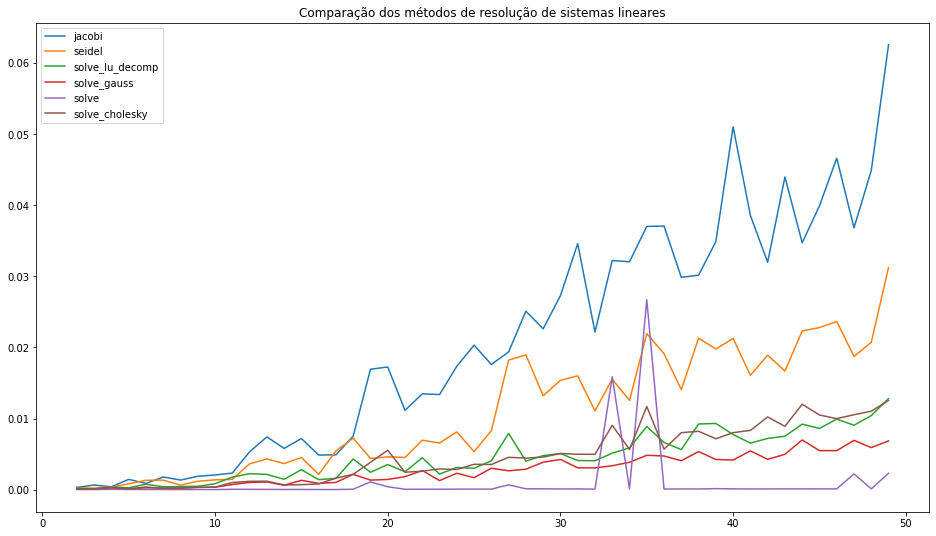

In [22]:
results_df.plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos de resolução de sistemas lineares');

### Comparação dos métodos iterativos

No gráfico abaixo, são comparados os métodos iterativos de gauss-jacobi e gauss-seidel. Como explicado anteriormente o método de gauss-seidel converge mais rápido pois a cada iteração é atualizado o x calculado na iteração anterior, o impacto dessa mudança fica claro no gráfico abaixo. 


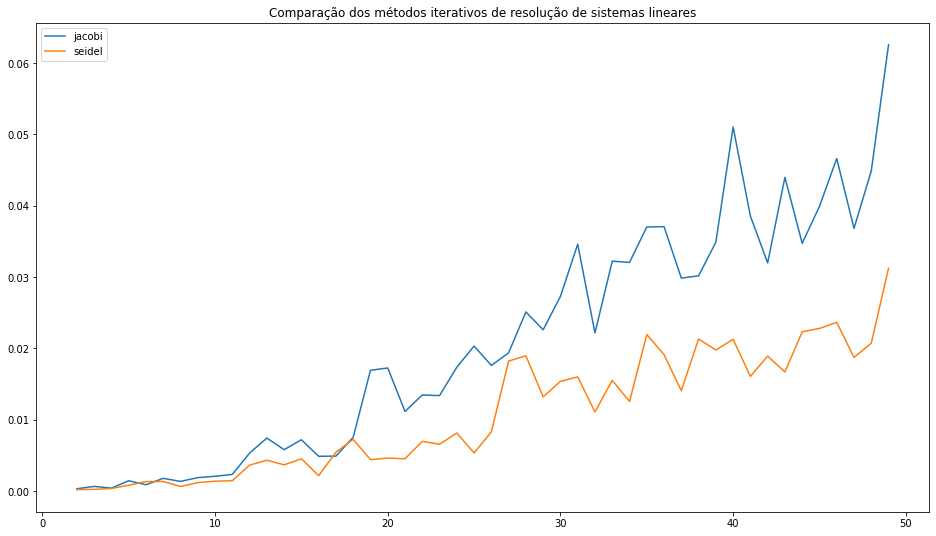

In [23]:
results_df[['jacobi', 'seidel']].plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos iterativos de resolução de sistemas lineares');

### Comparação dos métodos diretos

No gráfico abaixo, são comparados os métodos diretos: decomposição da LU, decomposição de cholesky,o método de gauss e o próprio do python.

Os métodos tem uma complexidade bem parecida todos em torno de $n^3$ flops, eles tem pequenas diferenças por conta da lógica e da implementação também.

Vale ressaltar a diferença do método de cholesky e o LU, o LU tem uma complexidade de $\frac{2n^3}{3}$ e o Cholesky de $\frac{n^3}{3}$, sendo então mais rápido que o LU como mostrado no gráfico.

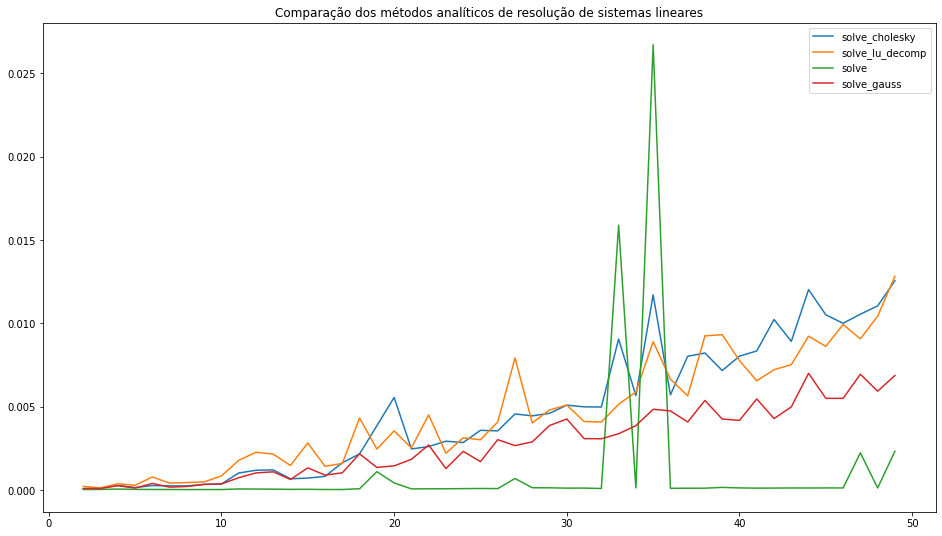

In [24]:
results_df[['solve_cholesky', 'solve_lu_decomp', 'solve','solve_gauss']].plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos analíticos de resolução de sistemas lineares');

# Autovalores e Autovetores

Nesse notebook apresentaremos métodos numéricos para se encontrar os autovalores e autovetores de uma matriz, assim como aplicações práticas desses métodos.

Antes de começarmos, vamos dar uma olhada em algumas definições.

## Relembrando conceitos

### Autovetores e Autovalores
     
$A \in M_{n}, \text{matriz quadrada}$    
$\lambda  \text{ escalar}$

Se existir $Av = \lambda v, v \in \mathbb{R}^{n} \text{ e } v\neq0 $

Dizemos que $\lambda$ é autovalor de $A$ associado ao autovetor $v$.

### Matriz ortogonal

Uma matriz $A \in M_{n}$ é considerada ortogonal se suas n colunas (ou linhas) formam um conjunto ortonormal de vetores no $\mathbb{R}^{n}$, i.e:

$$v_{i} \cdot v_{j} = \langle v_{i}, v_{j} \rangle = 0 \text{ e,}$$   
$$\left \| v  \right \| = 1$$

Esse tipo de matriz vai estar presente em um dos tópicos que vamos estudar - **a Decomposição QR** - e possui algumas propriedades:

1. $A^{T} = A^{-1}$
2. $\left \| Av  \right \| = \left \| v  \right \|$
3. $\lambda = \pm 1$ 
4. $\text{det}(A) = \pm1$

### Matrizes semelhantes

Duas matrizes $A, B \in M_{n}$ são ditas semelhantes se existir $P \in M_{n}$ tal que:   
$B = P^{-1}AP$

Matrizes semelhantes possuem o mesmo polinômio característico.

## Importando bibliotecas

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

## Algumas funções úteis

In [26]:
def rgb2gray(rgb):
    """ Transforma uma imagem colorida para uma imagem preto e branco
    
    Args:
        rgb: representação de uma imagem em RGB
    Retorno:
        matriz que representa imagem B&W
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [27]:
def generate_sim_matrix(n):
    """ Gera uma matriz simétrica nxn
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz simétrica
    """
    A = np.random.rand(n,n)
    return A@A.T

def generate_spd_matrix(n):
        Q = generate_sim_matrix(n)
        

## Projeção Ortogonal

A projeção ortogonal, de forma intuitiva, representa a sombra de um vetor em outro.

- $p r_{v}(u)$ é a notação utilizada para representar a projeção ortogonal de $u$ em $v$.
- $p r_{\perp v}(u)$ é a notação utilizada para representar o complemento ortogonal de $u$ em relação a $v$.

Para encontrar esses valores são utilizadas as seguintes fórmulas:

$$p r_{v}(u) = \frac{u \cdot v}{||v||^{2}} v $$

<p style='text-align: center;'> e </p>

$$p r_{\perp v}(u) = u - p r_{v}(u) $$

Esse é o início de uma sequência de conceitos e ideias que nos levarão até a Decomposição em Valores Singulares, também conhecida como SVD, mas é importante enxergar o valor individual de cada uma das ideias apresentadas aqui.

## Processo de Ortogonalização de Gram-Schmidt

O processo de Gram-Schmidt é utilizado para transformar um conjunto de vetores L.I "tortos" em um novo conjunto que é ortonormal. Nesse novo conjunto, a relação entre os vetores é mais clara, i.e, eles são 2 a 2 ortogonais e todos possuem norma 1.

**Entrada:** Conjunto linearmente independente $S = \{a_{1}, a_{2},...,a_{n}\} \in \mathbb{R}^{m}$ com $m \geq n$    
**Saída:** Conjunto *ortonormal* $ S' = \{q_{1}, q_{2},...,q_{n}\}$

Faremos o processo passo a passo para os três primeiros vetores para que a forma do Termo Geral fique mais clara:

- Para o vetor $a_1$, temos:

    $$v_{1} = a$$
    <p style='text-align: center;'> e </p> 
    $$q_{1} = \frac{v_{1}}{\lVert{v_{1}\rVert}_{2}}$$

<br>

- Para o vetor $a_2$, temos:

    $$v_{2} = a_{2} - \underbrace{(q_{1} \cdot a_{2})q_{1}}_{pr_{q_1}(a_2)}$$
    <p style='text-align: center;'> e </p><br> 
    $$q_{2} = \frac{v_{2}}{\lVert{v_{2}\rVert}_{2}}$$

<br>

- Para o vetor $a_3$, temos: 

    $$v_3 = a_3 - \left [ \underbrace{(q_1 \cdot a_3)q_1}_{pr_{q_1}(a_3)} + \underbrace{(q_2 \cdot a_3)q_2}_{pr_{q_2}(a_3)} \right ]$$
    <p style='text-align: center;'> e </p><br> 
    $$q_{3} = \frac{v_{3}}{\lVert{v_{3}\rVert}_{2}}$$

Analisando os termos anteriores, é possível perceber que o Termo Geral para obter $v_j$ ortogonal a $q_1, ... q_{j-1}$ é dado por:

$$v_j = a_j - \sum_{i=1}^{j-1}(q_i \cdot a_j)q_i$$

Depois, para obter $q_j$ basta normalizar $v_j$:
$$q_{j} = \frac{v_{j}}{\lVert{v_{j}\rVert}_{2}}$$

Esse processo é base do próximo método de Decomposição que estudaremos.

In [28]:
def gram_schmidt(vectors):
    """Aplica o processo de ortogonalização de Gram-Schmidt 
    a um conjunto S de vetores
    
    Args:
        vectors: conjunto S de vetores
    Retorno:
        conjunto ortonormal de vetores
    """
    basis = []
    
    for v in vectors:
        w = v - sum(np.dot(v,b)*b for b in basis)
        
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    
    return np.array(basis)

## Decomposição QR

Vamos estudar a Decomposição QR em sua forma reduzida pois ela é mais utlizada, mais simples e economiza memória.

A Decomposição QR de $A \in M(m, n), \text{ com }m > n$ é dada por 

$$A = QR$$

Onde $Q \in M(m, n)$ e $R \in M(n, n) \text{ triangular superior}$.

Abaixo, representaremos matrizes como um vetor de colunas, ou seja, o termo $a_1$ no vetor abaixo representa a primeira coluna da matriz A.

$$\underbrace{\left[
\begin{array}{c|c|c|c}
a_1 & a_2 & a_3 & ... & a_n \\
\end{array}
\right]}_{A} = \underbrace{\left[
\begin{array}{c|c|c|c}
q_1 & q_2 & q_3 & ... & q_n \\
\end{array}
\right]}_{Q}\underbrace{\begin{bmatrix}
 r_{11} & r_{12} & ...  & r_{1n}\\ 
 & r_{22} & ... & r_{2n} \\ 
 &  & \ddots & \vdots \\ 
 &  &  & r_{nn}
\end{bmatrix}}_{R}$$

- $a_1 = r_{11}q_1$
- $a_2 = r_{12} + r_{22}q_2$
- $\vdots$
- $a_n = r_{1n}q_1 + r_{2n}q_2 + ... + r_{nn}q_n$

Nosso objetivo é determinar as colunas $q_j$ e todos os $r_{ij}$.

Lembre-se: $Q$ é ortonormal. Qual processo que conhecemos pode transformar vetores quaisquer em vetores ortonormais? O *Processo de Ortogonalização de Gram-Schmidt*.

Por isso, basta aplicá-lo em $A$ para gerarmos $Q$! Agora só precisamos obter a matriz $R$, e isso é feito da seguinte forma:

$$r_{ij} = q_{i} \cdot a_{j}, i \neq j$$
<p style='text-align: center;'> e </p> 
$$\left | r_{jj}\right | = \lVert{v_{j}\rVert}_{2}$$

O processo de obtenção da matriz $R$ também pode ser visto da seguinte forma:

$$A = QR\\
Q^TA = Q^TQR\\
Q^TA = R, \text{ pois como Q é ortogonal, temos que } Q^TQ = I$$

Por fim, vamos conhecer um Teorema muito importante sobre essa decomposição.

**Teorema:** Toda matriz $A \in M(m,n)$ possui *Decomposição QR* completa e reduzida. Além disso, se $A$ tem posto completo, i.e, se suas colunas são linearmente independentes, então sua decomposição reduzida é única se $r_{jj} >0$.
 

In [29]:
def qr_decomposition(A):
    """ Realiza a decomposição QR na matriz A
    
    Args:
        A: matriz que será decomposta
    Retorno:
        as matrizes Q e R
    """
    Q = gram_schmidt(A.T)
    R = np.dot(Q.T, A)
    
    return Q, R

In [30]:
%%time

array = np.array([[3,1], [4,-1]])
qr_decomposition(array)

CPU times: user 401 µs, sys: 55 µs, total: 456 µs
Wall time: 416 µs


(array([[ 0.6,  0.8],
        [ 0.8, -0.6]]),
 array([[ 5.0000000e+00, -2.0000000e-01],
        [ 4.4408921e-16,  1.4000000e+00]]))

## Método de Francis

Dada uma matriz $A \in M_{n}, \text{ simétrica}$, o método de Francis é utilizado para calcular todos os seus autovalores e autovetores. Esse processo é realizando por meio de sucessivas decomposições QR até que se obtenha uma matriz diagonal - ou próxima disso.

Ao fim do processo teremos duas matrizes:
1. A, cuja diagonal aproxima os autovalores da matrix A original;
2. V, cujas colunas representam uma aproximação dos autovetores da matriz original.

Antes de iniciarmos o processo, é preciso saber que uma matriz A pode ser decomposta em duas matrizes - Q, R - utilizando um método que veremos posteriormente chamado de Decomposição QR. Com isso, o método de Francis se dá da seguinte forma:

- $A = QR, \text{utilizando Decomposição QR}$
- $A_{1} = A \rightarrow A_{1} = Q_{1}R_{1}$
- $A_{2} = R_{1}Q_{1} \rightarrow A_{2} = Q_{2}R_{2}$
- $A_{3} = R_{2}Q_{2} \rightarrow A_{3} = Q_{3}R_{3}$   
$...$   
- $A_{k-1} = R_{k-2}Q_{k-2} \rightarrow A_{k-1} = Q_{k-1}R_{k-1}$
- $A_{k} = R_{k-1}Q_{k-1}$

Note que $QR \neq RQ$ já que a multiplicação de matrizes não é comutativa.

Abaixo veremos algumas proposições e **conclusões sobre o método**:

**I.** As matrizes $A$ e $A_{k}$ possuem os mesmos autovalores e são, portanto, semelhantes. Como vimos anteriormente nesse mesmo notebook, matrizes semelhantes possuem o mesmo polinômio característico, e isso também quer dizer que têm os mesmos autovalores. 

**II. Autovalores:** A sequência $A_{k}$ converge para uma matriz diagonal - e *nessa diagonal estão nossos autovalores.*

**III. Autovetores:** A matriz $V = Q_{1}Q_{2}...Q_{k-1}$ aproxima os *autovetores de A em cada um de suas colunas.*

Agora vamos dar uma olhada em alguns possíveis **critérios de parada**:

1. Número máximo de iterações.
2. Maior do elementos fora da diagonal deve ser um número próximo de 0.
3. Norma da matriz original e da diagonal da matriz atual bem próximas.

In [31]:
def francis(A, eps):
    """ Realiza o Método de Francis
    
    Args:
        A: matriz
        eps: erro
    
    Retorno:
        V: matriz com os autovetores de A em suas colunas
        np.diag(A): autovalores de A
    """
    A = A.copy() # Ao fim do processo, terá os autovalores da matriz original em sua diagonal
    V = np.eye(len(A)) # Ao fim do processo, terá os autovalores em suas colunas
    
    it = 0
    while(np.max(np.absolute(np.tril(A, -1))) > eps):
        Q, R = np.linalg.qr(A)
        A = np.dot(R,Q)
        V = np.dot(V,Q)
        it += 1
    
    return V, np.diag(A)

## Singular Value Decomposition (SVD)

Dado $A \in M(n, m)$, sua Decomposição em valores singulares é dada por:

$$A = U\Sigma V^T$$

$\Sigma$ é diagonal e com magnitude decrescente, ou seja, se considermos $\sigma_{i}$ como um elemento de sua diagonal, teremos que: 

$$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_m \geq 0$$

$U, V$ são matrizes unitárias, ou seja:
$$U^TU = UU^T = I_{nxm}\\
V^TV = VV^T = I_{mxn}$$

Abaixo, temos uma imagem que exemplifica o formato de cada uma dessas matrizes antes e depois da redução de dimensões - que explicaremos melhor em breve:

<img src="images/svd_schema.png" alt="SVD Example" width=50%>

A próxima imagem mostra as matrizes ao fim do processo de redução de dimensões com um exemplo mais concreto - e complexo:
 
<img src="images/svd_example.png" alt="SVD Example" width=50%>

Vale pensar em $\Sigma$ como a intensidade - ou importância - de $u_{i}$ ($i$-ésimo vetor coluna de $U$) e $v_{i}$ ($i$-ésimo vetor linha de $V$) na representação final de $A$.

Para aprendermos a calcular as matrizes, vamos precisar analisar dois produtos diferentes 1. $AA^T$ e 2. $A^TA$:

1. Analisando $AA^T$:

$$
A A^T = (U \Sigma V^{T}) \cdot (U \Sigma V^{T})^T
\\A A^T = U \Sigma (V^{T} V ) \Sigma^{T} U^{T}\\
A A^T = U \Sigma ^{2} U^{T},\\
\text{ pois } U \text{ é ortonormal e } \Sigma \text{ simétrica.}
$$

2. Analisando $A^TA$:

$$
A^T A = (U \Sigma V^{T})^{T} \cdot (U \Sigma V^{T})\\
A^T A = V \Sigma^{T} (U^{T} U) \Sigma V^{T}\\
A^T A = A^T A = V \Sigma ^{2} V^{T},\\ 
\text{ pois } U \text{ é ortonormal e } \Sigma \text{ simétrica.}
$$

Sabendo que $A A^{T}$ e $A^{T} A$ e que os resultados encontrados acima são suas respectivas decomposições espectrais, podemos entender que:

1. Os autovetores de $A A^{T}$ são os vetores coluna de $U$.
2. Os autovetores de $A^{T} A$ são os vetores coluna de $V$.
3. $\Sigma$ contém, em sua diagonal, os autovalores de $A A^{T}$ e $A^{T} A$
4. $\Sigma^{2}$ tem sua diagonal formada pelo quadrado dos valores singulares de $A$.

Com isso em mente, é possível perceber que podemos utilizar o Método de Francis para encontrar as matrizes que queremos.


In [32]:
def calculate_svd(A, eps):
    """ Realiza a Decomposição em Valores Singulares 
    de uma matriz A
    
    Params:
        A: matriz que será decomposta
        eps: erro utilizado no Método de Francis
    Retorno:
        matrizes U, S e V
    """
    U, _ = francis(A@A.T, eps)
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return U, S, V

In [33]:
def calculate_svd_sim(A, eps):
    """ Realiza a Decomposição em Valores Singulares 
    de uma matriz A de uma matriz simétrica de forma
    mais eficiente
    
    Params:
        A: matriz que será decomposta
        eps: erro utilizado no Método de Francis
    Retorno:
        matrizes U, S e V
    """
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return V, S, V

In [34]:
def svd(A, eps):
    """ Verifica se matriz é simétrica e decide
    qual função SVD usar
    
    """
    if np.all(np.abs(A-A.T) < 1e-8):
        return calculate_svd_sim(A, eps)
    else:
        return calculate_svd(A, eps)

### Testando SVD

In [35]:
A = generate_sim_matrix(30)

#### Sem assumir matriz simétrica

In [36]:
%%time
U, S, V = calculate_svd(A, 1e-02)

CPU times: user 42.4 ms, sys: 0 ns, total: 42.4 ms
Wall time: 41.6 ms


#### Assumindo matriz simétrica

In [37]:
%%time
U, S, V = calculate_svd_sim(A, 1e-02)

CPU times: user 17.4 ms, sys: 191 µs, total: 17.6 ms
Wall time: 17.7 ms


## Aplicação: Compressão de Imagens

Nesse notebook estudaremos uma aplicação muito famosa da SVD: Compressão de imagens.

Imagens, como veremos logo abaixo, são apenas matrizes interpretadas de uma forma específica. Para facilitar o entendimento, podemos dividir imagens em dois grupos:

### Entendendo como imagens são representadas  no computador

1. Preto e branco: imagens em preto em branco podem ser representadas utilizando apenas uma matriz. Cada valor dessa matriz se refere a um pixel da imagem e pode variar no intervalo de 0 a 255 (preto até branco)

2. Coloridas: imagens coloridas são representadas por 3 ou mais matrizes, cada uma representando um canal de cor. É bem comum que uma imagem colorida possua 3 canais: RGB (Red, Green e Blue).

In [38]:
img = plt.imread('images/foto.jpg', 'jpg')
bw_img = rgb2gray(img)

In [39]:
print(f'Dimensão de imagem preto e branco: {bw_img.shape}')
print(f'Dimensão de imagem colorida: {img.shape}')

Dimensão de imagem preto e branco: (1280, 960)
Dimensão de imagem colorida: (1280, 960, 3)


Perceba que, enquanto a imagem preto e branco possui apenas 2 dimensões, a imagem com cores possui 3. Vamos dar uma olhada nessas duas imagens:

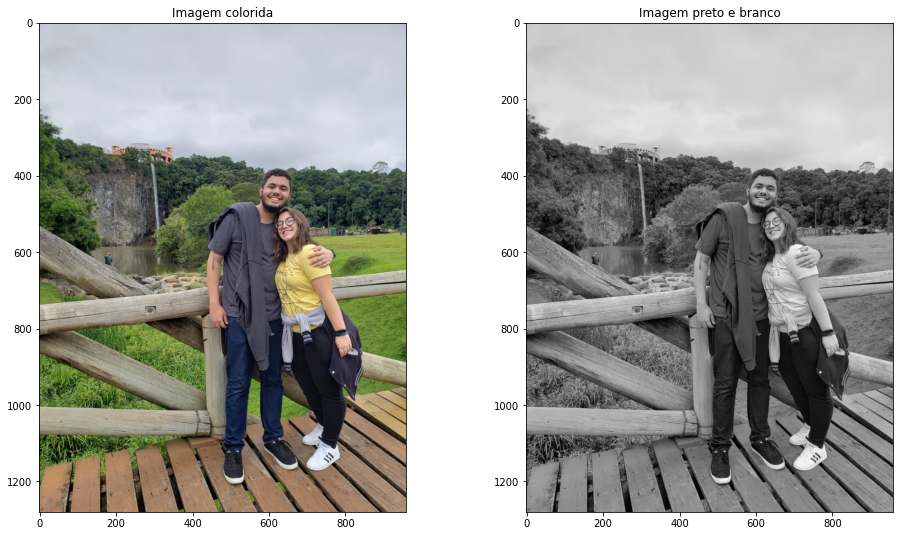

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

axes[0].set_title('Imagem colorida')
axes[0].imshow(img)

axes[1].set_title('Imagem preto e branco')
axes[1].imshow(bw_img, cmap='gray')

plt.show()

### Comprimindo imagens utilizando SVD

Agora vamos utilizar toda a matemática que aprendemos nesse notebook para reduzir o tamanho de uma imagem - mantendo o máximo de informação possível!

Para fazer isso vamos decompor a imagem utilizando SVD e, na hora de recriá-la, vamos utilizar uma quantidade menor de valores singulares. Lembre-se, de forma intuitiva, os valores singulares podem ser vistos como a intensidade - ou importância - de $u_{i}$ ($i$-ésimo vetor coluna de $U$) e $v_{i}$ ($i$-ésimo vetor linha de $V$) na representação final de $A$. Por esse motivo, reduzir sua quantidade é uma forma de reduzir a quantidade de detalhes da imagem começando pelas partes que "menos importam".

In [41]:
def compress(img, singular_values_n = 'all'):
    
    compressed_img = img.copy()
    num_channels = img.shape[2]
    
    for idx in range(num_channels):
        color_channel = img[:, :, idx]
        
        U,S,V = np.linalg.svd(color_channel)
        S = np.diag(S)
        
        r = (S.shape[0] if singular_values_n == 'all' else singular_values_n)

        comp_channel = U[:, :r] @ S[:r, :r] @ V[:r, :]
        compressed_img[:, :, idx] = comp_channel
    
    return compressed_img

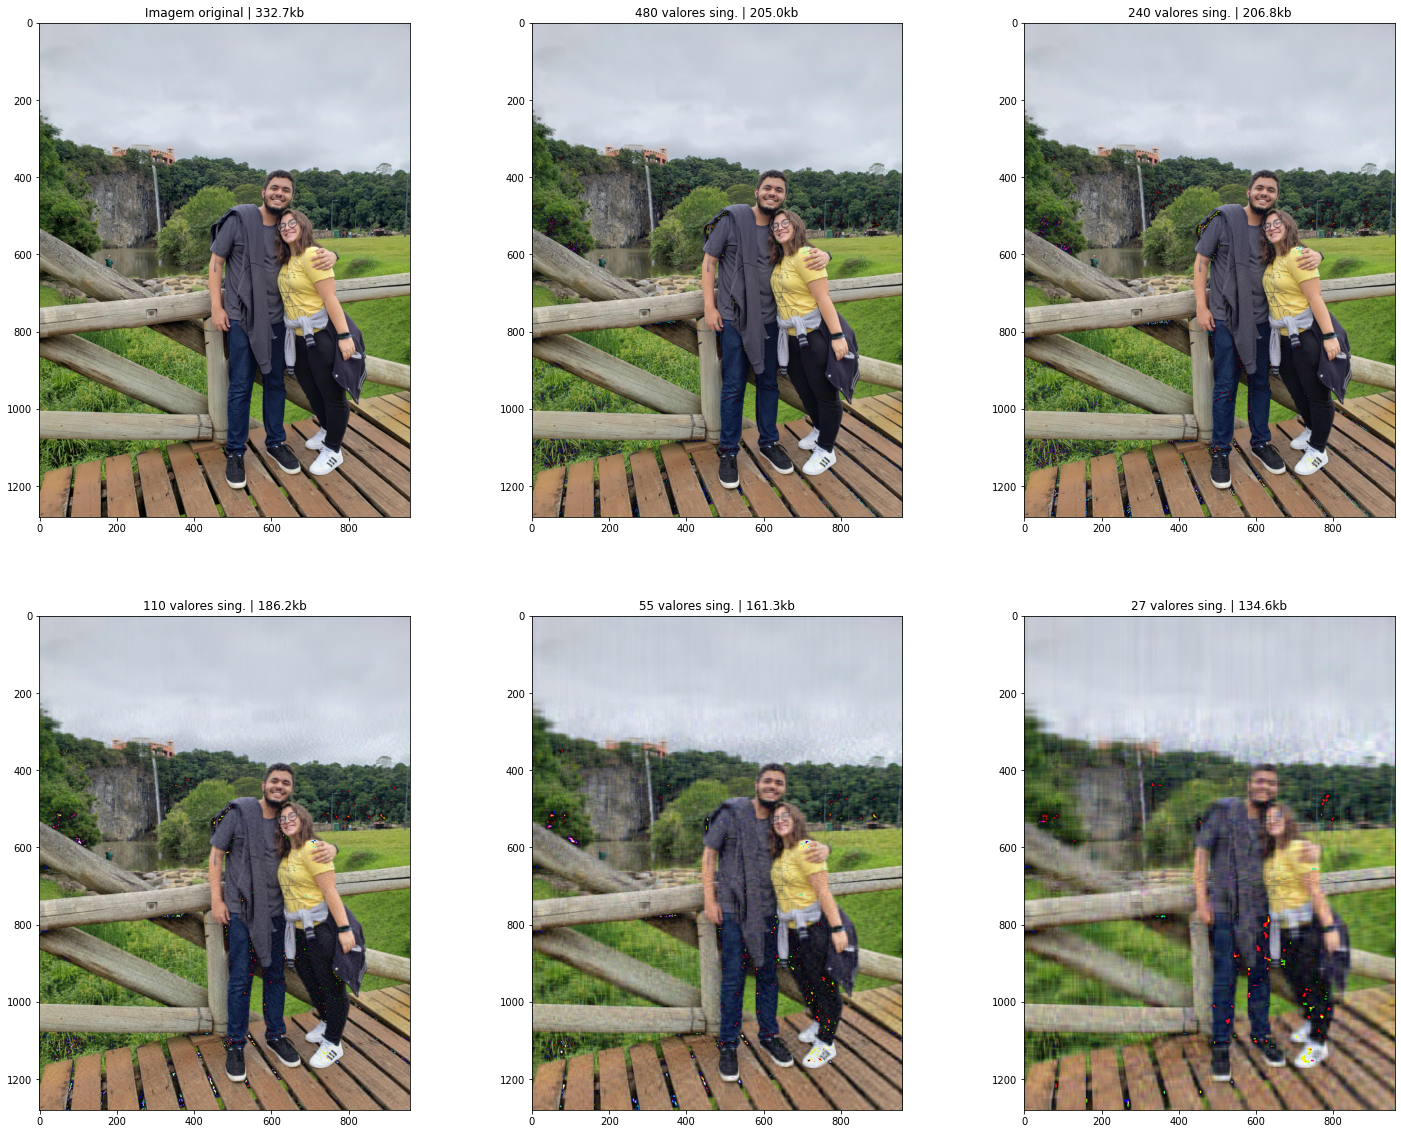

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

singular_values_list = [960, 480, 240, 110, 55, 27]
idx = 0

for i in range(2):
    for j in range(3):
        
        singular_values = singular_values_list[idx]
        
        if i == 0 and j == 0:
            compressed_img = plt.imread('images/foto.jpg', 'jpg')
            image_size = os.stat('images/foto.jpg').st_size/1000
            image_title = f'Imagem original | {image_size:.1f}kb'
        else:
            compressed_img = compress(img, singular_values)
            matplotlib.image.imsave(f'svd_images/{singular_values}.jpg', compressed_img)
            image_size = os.stat(f'svd_images/{singular_values}.jpg').st_size/1000
            image_title = f'{singular_values} valores sing. | {image_size:.1f}kb'

        axes[i, j].set_title(image_title)
        axes[i, j].imshow(compressed_img)
        
        idx += 1

É possível perceber que o tamanho (em Kb) diminui conforme diminuímos o número de valores singulares.

Vamos dar uma olhada mais de perto na imagem original vs. a imagem com 240 valores singulares que foi salva em .jpg:

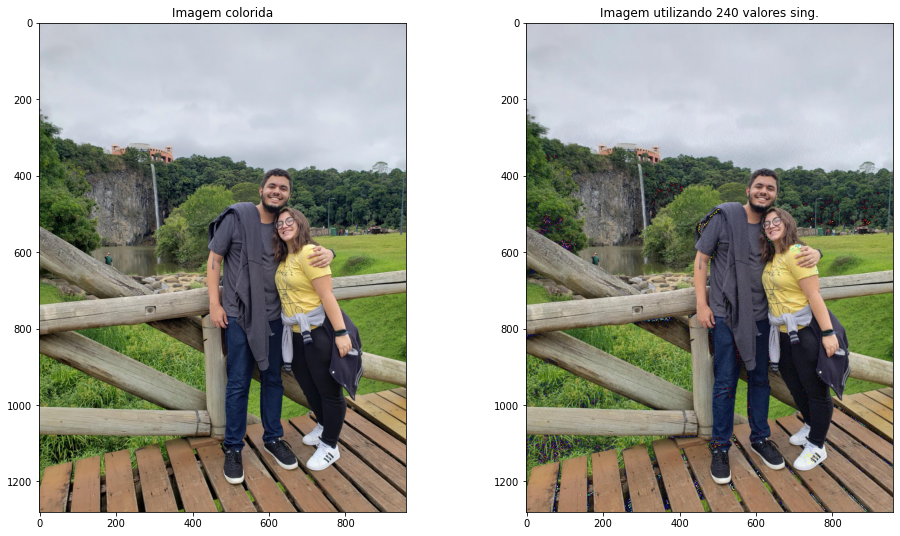

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

img = plt.imread('images/foto.jpg', 'jpg')
axes[0].set_title('Imagem colorida')
axes[0].imshow(img)

img_240 = plt.imread('svd_images/240.jpg', 'jpg')
axes[1].set_title('Imagem utilizando 240 valores sing.')
axes[1].imshow(img_240)

plt.show()

Repare que as regiões mais afetadas pela compressão foram as regiões mais escuras da imagem. Perdendo informação dessas regiões, foi possível manter uma imagem mais detalhada em outros lugares.

### Analisando relação do tamanho do arquivo com o número de valores singulares

Nessa seção vamos analisar o comportamento do tamanho do arquivo conforme reduzimos o número de valores singulares, pode ser interessante!

Para fazer isso de forma mais simples, vamos trabalhar com a versão preto e branco da imagem.

In [44]:
singular_values = range(5, 945, 5)
image_size_list = []

U,S,V = np.linalg.svd(bw_img)
S = np.diag(S)

for r in singular_values:
    compressed_img = U[:, :r] @ S[:r, :r] @ V[:r, :]
    matplotlib.image.imsave(f'svd_images/{r}.jpg', compressed_img)
    image_size = os.stat(f'svd_images/{r}.jpg').st_size/1000
    
    image_size_list.append(image_size)

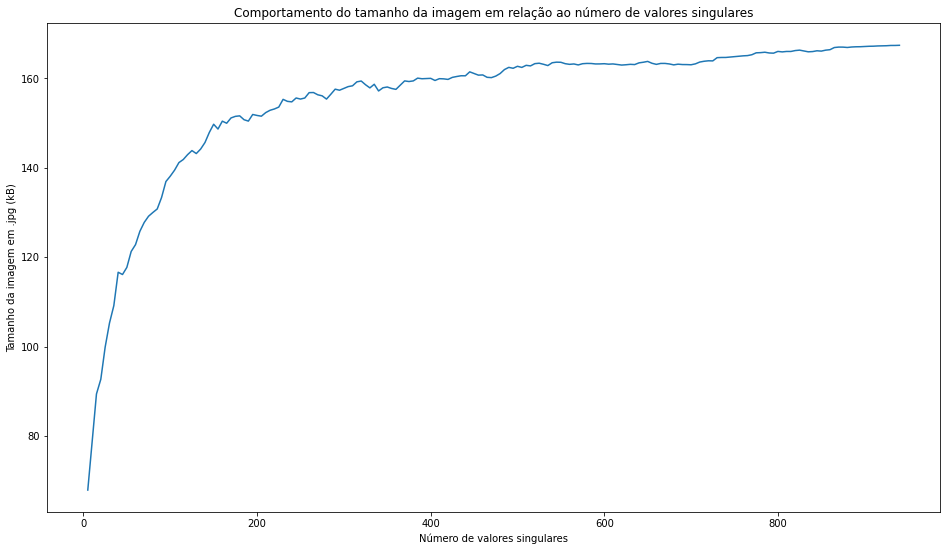

<Figure size 1152x648 with 0 Axes>

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

plt.figure(figsize=(16,9))
axes.set_xlabel('Número de valores singulares')
axes.set_ylabel('Tamanho da imagem em .jpg (kB)')
axes.set_title('Comportamento do tamanho da imagem em relação ao número de valores singulares')
axes.plot(list(singular_values), image_size_list)

plt.show();

# Sistemas não-lineares


## Zero de Funções

Seja $f$ uma função contínua no intervalo $[a,b]$, queremos encontrar soluções para a equação não-linear:

$$f(x) = 0$$

Todos os valores que satisfazem essa equação acima são chamados de raízes ou zeros da $f(x)$ e serão denotadas por $\alpha$.

Vamos utilizar métodos iterativos para encontrar essas raízes, como é uma equação não-linear, não existe um número determinado de raízes.

### Método iterativo

Para resolver equações de grau 2 e 3 até existem métodos para resolução de equações mas quando o grau vai crescendo não temos uma forma analítica de resolver.

Então precisa ser resolvido por um método iterativo, ou seja, dado um chute inicial $x_{0}$, gerar uma sequência de iterados que queremos que convirja para uma raiz da função. Assim não encontramos uma solução exata mas sim uma aproximação dela.

**Para isso, precisamos:**

- Determinar um intervalo que contenha essa raiz $\alpha$

Pelo teorema do valor intermediário (TVI), se a função for contínua no intervalo $[(a,b)]$ e a $f(a)$ e $f(b)$, funções variadas no extremos, tem sinais diferentes então vai existir um $\alpha$ no interior desse intervalo tal que $f(\alpha)$ é 0, ou seja, Se $f \in C([a,b]$ e $f(a)f(b)<0 \Rightarrow \exists \alpha \in (a,b)$.

Para encontrar podemos plotar o gráfico e ver o intervalo que a função corta o eixo x.

**Critério de parada**

Critério de parada é o critério que ao ser atingido o processo iterativo é finalizado. Nesse caso $\varepsilon$ e $\tau$ são valores pré-definidos pelo usuário. Lembrando que os critérios abaixo podem ser combinados:

1) Número de iterações, ao satisfazer a condição abaixo o processo é finalizado:

$$k = k_{max} $$

2) Erro absoluto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left | x^{(k+1)} - x^{(k)}\right | < \varepsilon $$

3) Erro relativo, mais robusto que o anterior, usado quando não quer levar em conta a ordem de grandeza, ao satisfazer a condição abaixo o processo é finalizado:

$$\frac{\left | x^{(k+1)} - x^{(k)}\right |}{x^{(k+1)}}<\varepsilon $$

4) Teste de resíduo, a precisão não é garantida, ao satisfazer a condição abaixo o processo é finalizado:

$$\left | f(x_{k})\right | < \tau  $$

### Métoda da bisseção

Esse método é baseado no TVI, pois sabemos que em determinado intervalo se os a função nos extremos tiverem sinais diferentes então com certeza a curva corta o eixo $x$.

1) Ao plotar o gráfico observa o intervalo $[(a,b)]$ em que a função é continua e corta o eixo $x$ <br>
2) Divide o intervalo ao meio, se o resultado for positivo: o valor do extremo em que a função é positiva recebe esse novo valor. Já se for negativo: o valor do extremo em que a função é negativa recebe esse novo valor. Sempre mantendo um dos valores do intervalo com sinais diferentes<br>
3) Repete o segundo passo até atingir o critério de parada estabelecido<br>

Para ilustrar melhor esse processo só observar o gif abaixo, mostra a curva $\frac{1}{5}x^3 + 5$, onde selecionei o intervalo $(-10,0)$

<img src="snl_imagens/bissecao.gif" width="400" align="left" >
<br><br><br><br><br><br><br><br><br><br><br><br>

**Vantagens:**

- Facil implementação
- Seguro, se for passado o intervalo certo
- Sempre vai convergir para uma raiz
- Requer apenas que seja continuo e mude de intervalo

**Desvantagens:**

- Lento 
- Difícil de generalizar para sistemas de equações não lineares

**Teorema que garante a convergência**

Suponha $f \in \mathcal{C}([a,b])$ e $f(a)f(b)<0$. O método da bisseção gera uma
sequência ${x_0, x_1, . . .}$ que se aproxima de uma raiz $\alpha$ de $f$ com:
$$\left| x_{k} − \alpha \right| \leq \frac{b − a}{2^{k}}$$

Como visto pelo TVI, sabemos que ao escolher o intervalo certo vai ter uma raiz nesse intervalo e o método da bisseção garante que sempre $f(a)$ e $f(b)$ terão sinais opostos, garantindo a aproximação da raiz. 

**Número de iterações**

Usando esse teorema podemos estimar o número de iterações ($k$) que vamos precisar para determinada tolerância:

Queremos que $x_{k} - \alpha < \varepsilon$, ou seja, a distância do valor encontrado para a raiz real seja do $\varepsilon$ dado.

- Utilizando o teorema, sabemos que $\left | x_{k} - \alpha \right | < \varepsilon \leq \frac{b − a}{2^{k}}$<br>
- Supondo a igualdade e aplicando $\log$ temos que $\log_{2}\varepsilon = \log_{2}\frac{b − a}{2^{k}}$. <br>
- Utilizando a propriedade de $\log$ temos que $\log_{2}\varepsilon = \log_{2}(b − a) - \log_{2}2^{k} \Leftrightarrow \log_{2}\varepsilon = \log_{2}(b − a) - k$. 
- Isolando $k$ conseguimos que a expressão que estima o número de iterações é $k = \log_{2}(b − a) - \log_{2}\varepsilon$ 


In [46]:
import numpy as np
import math 

In [47]:
def bissecao(funcao,a,b,tol = 1e-6, kmax = 500): 
    """ Encontra a raiz da função presente no intervalo dado 
            usando o Método da bisseção
    
    Args:
        funcao: a funcao que queremos encontrar a raiz
        a,b: intervalo 
        tol: tolerância desejada
        kmax: número de iterações máximo
    Retorno:
        raiz aproximada x, numero de iterações necessárias
    """
    
    #calcula o valor médio
    x = (a+b)/2
    erro = np.inf
    k = 0
    
    while(erro > tol and k < kmax):
        
        # se a e x tem sinais contrários
        if(funcao(a)*funcao(x)<0):
            b = x
        # se a e x tem sinais diferentes
        else:
            a = x
        
        x0 = x
        x = (a + b)/2 
        erro = abs(x-x0)
        k = k + 1
    
    return x,k


In [48]:
# aplica o método da bisseção para encotrar a raiz do exemplo 0.2*xˆ5 + 5, que foi mostrado o gráfico no resumo

f = lambda x: (0.2)*x**3 + 5
a = -10; b = 0; tol = 1e-6;

x,k = bissecao(f,a,b)

print(f'A raiz encontrada foi {x}\n')

# Calcula o número de iterações estimada
k_estimado = math.log(b-a,2) - math.log(tol,2)

print(f"Número de iterações realizadas:{k} \nNúmero de iterações estimada:{k_estimado}")


A raiz encontrada foi -2.924017310142517

Número de iterações realizadas:23 
Número de iterações estimada:23.253496664211536


## Método de Ponto Fixo

O problema de encontrar $f(x) = 0$ pode ser reescrito na forma  $g(x) = x $, ou seja, agora queremos encontrar o ponto fixo, isto é um ponto $\alpha$ que satisfaz a equação  $g(\alpha) = \alpha$.

Existem várias maneiras de escrever $g(x) = x$ a partir da $f(x)$:

-  Podemos escrever da forma $g(x) = x - \lambda f(x)$ onde $\lambda$ é um real qualquer, já que se $x$ for $\alpha$, e $f(\alpha) = 0$ então chegamos em $g(x) = x$;<br>
-  Podemos escrever da forma $g(x) = x - \frac{f(x)}{f'(x)}$ se a $f(x)$ for derivável e não se anulo, ou seja, $f'(x)$ existe e $f'(x)\neq 0$, a forma que utilizamos para o Método de Newton. Pode ser escrita pela mesma explicação da forma acima.

### Método

**Passo a passo**

1) Dada um função real $f(x)$. Escolha uma função $g(x)$ tal que $f(x) = 0 \Leftrightarrow x = g(x)$, ou seja, encontrar o zero da $f(x)$ é o mesmo que encontrar o ponto fixo da $g(x)$. Podemos escolher várias $g(x)$ possíveis mas dependendo da escolhida pode convergir mais rápido, mais devagar ou pode até nao convergir.

2) Chuta um valor inicial $x_{0}$

3) Começa o processo iterativo $x_{k+1} = g(x_{k})$, para $k = 1,2,3 ..$, então vamos utilizar o x anterior para calcular o novo valor.

4) Quando $x_{k+1}$ satisfazer algum dos critérios de parada acaba o processo

**Graficamente**

Podemos demonstrar esse processo graficamente através do gif abaixo:

<img style="float:left; padding-right:7px;" src="snl_imagens/ponto_fixo.gif" width="370" align="left" >
<br><br>
  1) Dado o $x_{0} = 5$, vai paralelamente ao eixo $x$ até a reta $y = x$, ou seja, dado o x qual o valor do $x_{k+1}$;<br><br>
  
  2) Depois vai paralelamente ao eixo y até nossa $g(x)$, ou seja, aplicar na nossa $g(x)$ esse novo valor de $x$;<br><br>
  
  3) Repete o processo e com o tempo irá convergindo para o ponto em que as dois gráficos se encontrarm que é justamente $ x = g(x)$

<br><br><br><br>

**Teorema**: Considere o Método do Ponto Fixo $x_{k+1} = g(x_{k}) k = 1,2,3 ..$.

1) Se $g \in \mathcal{C}([a,b])$ e $g(x) \in [a, b]$, para todo $x \in [a, b]$, então existe um ponto fixo $\alpha \in [a, b]$ de $g(x)$ (Ou seja, para todo valor de $x$ que está no intervalo o $g(x)$ continua no intervalo).<br><br>
2) Se, adicionalmente, a derivada $g'(x)$ existir e se houver uma constate ($\rho  < 1)$, tal que: <br><br>$$\left|g'(x)\right| \leq \rho \forall x \in (a, b),$$ então o ponto fixo $\alpha$ é único e a sequência gerada converge para $\alpha$ independente da escolha do $x_{0} \in [a,b]$.

### Taxa de convergencia

Para encontrar a taxa de convergência vamos usar o que vimos antes e o teorema anterior:

- Supondo que $\alpha$ é um ponto fixo do processo iterativo com $\rho = \left |g'(\alpha)\right|$ e $ 0 < \rho < 1$

- Aplicando a Fórmula de Taylo caso $x_0$ seja suficientemente perto de $\alpha$ podemos dizer que $ x_k − \alpha \approx g'(\alpha)(x_{k−1} − \alpha)$

- Aplicando módulo dos dois lados ficamos com $\left |x_k − \alpha\right | \approx \left |g'(\alpha)(x_{k−1} − \alpha) \right|$, como sabemos que $\rho = \left |g'(\alpha)\right|$, substituimos e ficamos com a expressão $\left |x_k − \alpha\right | \approx \rho\left |x_{k−1} − \alpha\right|$ (*)

- Analogamente sabemos que  $\left |x_{k−1} − \alpha\right| \approx \rho\left |x_{k−2} − \alpha\right|$, então podemos substituir na expressão * , assim ficamos com $\left |x_k − \alpha\right | \approx \rho\rho\left |x_{k−2} − \alpha\right|$ 

- Fazendo esse processo continuamente chegamos na equação final $\left |x_k − \alpha\right | \approx \rho^{k}\left |x_{0} − \alpha\right|$ 

- Para calcular quantas iterações levariam para reduzir o erro por um fator fixo de 10, dizemos que  
$\left |x_k − \alpha\right | \approx  \frac{1}{10}\left|x_{0} − \alpha\right|$, ou seja, $\rho^{k}$ é $10^{-1}$

- Aplicando log chegamos que $k\log(\rho) = -1$, assim nossa taxa será $-\log(\rho)$ e o $k = \frac{1}{\text{taxa}}$, ou seja quanto maior a taxa menor a quantidade de iterações para reduzir o erro.  




## Método de Newton

É um método de ponto fixo, e a ideia é linearizar a função em torno de $x_{k} \approx \alpha$, sendo $\alpha$ minha raiz

Para esse método $f(x)$:
- Função que buscamos a raiz $\alpha$ deve ser diferenciável.
- A derivada deve ser simples de ser calculada comparada com a $f(x)$ se não teriam que ser feitas muitas regras da cadeia deixando o algoritmo custoso

Expandindo pela Fórmula de Taylor $f(x)$ em torno do ponto $x_{k}$, conseguimos a expressão:<br><br>
$$f(x) \approx f(x_k) + f'(x_k)\cdot(x-x_k)$$
Substituindo $x$ por $\alpha$, todos os termos $f(\alpha)$ ficam 0 e ao isolar $\alpha$ ficamos com a expressão:<br><br>
$$\alpha \approx x_k - \frac{f(x_k)}{f'(x_k)}$$

Vamos utilizar essa expressão para ser justamente nossa $g(x)$ que falamos no método do ponto fixo, nota-se assim que $\alpha = g(\alpha)$, pois na expressão fica $g(\alpha) = \alpha + \underset{0}{\underbrace{\frac{f(\alpha)}{f'(\alpha)}}}$.

#### Processo iterativo

Da mesma forma que o processo do ponto fixo o processo iterativo do método de newton segue a expressão abaixo com o objetivo de $x_{k+1}$ convergir para o nosso $\alpha$:<br><br>
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, k = 0, 1, ...(*)$$ 


**Passo a passo:**
<br><br>
1) Chuta um $x_0$<br>
2) Para k = 0, 1... calcula o $x_{k+1}$ seguindo o a expressão $*$ <br>
3) Ao atingir um critério de parada o processo acaba
<br>

**Graficamente** 

O processo é basicamente é pegar o ponto $x_0$, aplicar a $f(x)$ para ver o resultado, pega a derivada desse ponto que é a tangente a esse ponto e calcula a intersecção desse ponto no eixo $x$. O ponto onde foi a intersecção é o nosso próximo iterado $x_1$.
Repetimos o processo aplicamos a $f(x)$ no ponto, calcula a derivada e vê onde a tangente corta o eixo, encontrando nosso $x_3$.

<img src="snl_imagens/newton.png" width="600" align="left" >
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


**Obs**:Para funcionar precisa escolher um bom $x_{0}$, dependendo da escolha pode não convergir

**Vantagens**
- Facil de implementar
- A generalização para sistemas de equação é trivial
- Convergencia rápida, converge quadraticamente

**Desvantagens**

- Dependendo do $x_0$ pode não convergir
- Requer o cálculo da derivada
- A função pode não ser diferenciavel

In [49]:
def newton(funcao,dfuncao,x0,tol = 1e-6, kmax = 500,flag_print = 0):
    """ Encontra o ponto fixo da função usando o método de newton
    
    Args:
        funcao: a funcao que queremos encontrar o ponto fixo
        dfuncao: a derivada da funcao que queremos encontrar o ponto fixo
        x0: chute inicial
        tol: tolerância desejada
        kmax: número de iterações máximo
    Retorno:
        ponto fixo aproximado x, numero de iterações necessárias
    """
    
    k = 0
    x = x0 
    
    # começa em ifinito
    erro = np.inf
    
    
    while(k < kmax and erro > tol):
        
        dx = (funcao(x)/dfuncao(x))
        x = x - dx
        erro = abs(dx)
        
        if(flag_print):
            print(f'It {k}: {erro}')
            
        k = k + 1
        
    if(k == kmax):
        return np.nan, k
    else:
        return x, k


In [50]:
# O mesmo exemplo testado com o método da bisseção
f = lambda x: (0.2)*x**3 + 5
df = lambda x: (0.2)*3*x**2  

x,k = newton(f,df,2)

# O numéro de iterações foi menor
print(f'A raiz encontrada foi {x} com {k} iterações\n')


A raiz encontrada foi -2.924017738212866 com 11 iterações



## Método da Secante

É justamente o método de newton, sem calcular a derivada pois vamos aproxima ela a diferença finita abaixo:<br><br>
$$f'(x_k) \approx\frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

Depois só substituir na equação que utilizamos para o método de newton esse valor aproximado da derivada e ficamos com:<br><br>

$$x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}$$

**Vantagem comparado com o método de newton**
- Não é preciso calcular a derivada 

**Desvantagens comparado com o método de newton**

- É preciso dois chutes iniciais
- A convergência é um pouco mais lenta

In [51]:
def secante(funcao,x0,x1,tol = 1e-6, kmax = 500,flag_print = 0):
    """ Encontra o ponto fixo da função usando o método da secante
    
    Args:
        funcao: a funcao que queremos encontrar o ponto fixo
        x0: chute inicial 0 
        x1: chute inicial 1
        tol: tolerância desejada
        kmax: número de iterações máximo
    Retorno:
        ponto fixo aproximado x, numero de iterações necessárias
    """
    
    k = 0
    x = x1 
    erro = np.inf
    

    while(k < kmax and erro > tol):
        
        #calcula aproximadamente a derivada
        dfuncao = (funcao(x) - funcao(x0))/(x-x0)
        dx = (funcao(x)/dfuncao)
        
        x0 = x;
        x = x - dx
       
        erro = abs(dx)
        
        if(flag_print):
            print(f'It {k}: {erro}')
        k = k + 1
       
    # caso chegue no máximo de iterações e não convergir retorna nan
    if(k == kmax):
        return np.nan, k
    else:
        return x, k


In [52]:
# O mesmo exemplo testado com o método da bisseção e em newton
f = lambda x: (0.2)*x**3 + 5
df = lambda x: (0.2)*3*x**2 

x,k = secante(f,2,2.5)

# Tem uma velocidade de convergencia próxima da de newton nesse caso a mesma
print(f'A raiz encontrada foi {x} com {k} iterações\n')

A raiz encontrada foi -2.9240177382132133 com 11 iterações



# Convergência dos métodos

**Definição (ordem de convergência)**<br><br>
Seja ${x_k}$ uma sequência obtida por um método iterativo tal que $x_k \rightarrow x$, com $x \neq
x_k, \forall k$. Se existirem um número $p \geq 1$ e uma constante $c >$ 0 tais que:<br><br>
$$\lim_{k \rightarrow \infty} \frac{(\left|x_{k+1} − x \right|}{(\left|x_k − x \right|)^p} = c,$$<br>
então $p$ é a ordem de convergência desse método.

**Analisando valores**<br>

Quanto maior o $p$ maior a taxa de convergência

1) Se $p = 1$ (e $c < 1$), o método possui convergência linear;<br>
2) Se $p = 2$, o método possui convergência quadrática (Método de Newton), significa dobrar em cada iteração a precisão da raiz;<br>
3) Se $p \approx 1.6$, o metodo possui convergência super linear (Método da Secante).<br>


#### Teoremas 

**Teorema (convergência do Método de Newton)**<br>
Se $f \in C^2 ([a, b])$ e existir $\alpha \in [a, b]$, tal que $f(\alpha) = 0$ e $f'(\alpha)\neq 0$, então
existe $\delta > 0$ tal que a sequência ${x_k}$ gerada pelo Método de Newton converge quadraticamente para $\alpha, \forall x_0 \in (\alpha − \delta, \alpha + \delta)$.<br>
(Ou seja, para todo $x_0$ suficientemente perto da raiz a convergência quadrática irá acontecer, se estiverem na condições acima).

**Teorema (convergência do Método da Secante)**<br>

Se $f \in C^2 ([a, b])$ e existir $\alpha \in [a, b]$, tal que $f(\alpha) = 0$ e $f'(\alpha)\neq 0$, então
existe $\delta > 0$ tal que a sequência ${x_k}$ gerada pelo Método da Secante converge super linearmente para $\alpha, \forall x_0,x_1 \in (\alpha − \delta, \alpha + \delta)$.<br>
(Da mesma forma que o método acima mas agora precisaremos que os dois chutes iniciais estejam suficientemente perto da raiz para que a haja a convergência super linear).

**Obs:** Por isso é muito importante sempre plotar a curva para encontrar bons chutes iniciais

### Estudo de convergência do Método da Secante e de Newton

Podemos observar nos exemplos abaixo a convergência de ambos os métodos

**Newton**

A convergência desse método é quadrático, ou seja, a cada iteração a precisão da raiz tende a ir duplicando, isso fica claro principalmente no final que o erro estava de $\approx 1e-6$ e passa para $1e-12$

**Secante**

Como observado no exemplo abaixo, o erro diminui um pouco mais devagar que o Método de Newton, mas é o que é considerado convergência super linear, mais rápido que linear mas mais devagar que o quadrático. Isso fica claro ao final do processo já que a secante foi de $\approx 1e-5$ para $1e-8$

In [53]:
print('Método de Newton:\n')
x,k = newton(f,df,2,flag_print=1)
print('\nMétodo da Secante\n')
x1,k1 = secante(f,2,2.5,flag_print=1)

Método de Newton:

It 0: 2.7499999999999996
It 1: 14.56481481481483
It 2: 5.069408267759515
It 3: 3.335746510223698
It 4: 2.1286758236592584
It 5: 1.2290887127662153
It 6: 0.523426274302797
It 7: 0.1008903871889696
It 8: 0.0035567707425204456
It 9: 4.3299525785914126e-06
It 10: 6.411768828393022e-12

Método da Secante

It 0: 2.6639344262295075
It 1: 4.2603426994504225
It 2: 3.0306314948024053
It 3: 0.80532157794993
It 4: 1.459720752721179
It 5: 0.9127567154505744
It 6: 0.13868040059350492
It 7: 0.041930400040676025
It 8: 0.002558615595277457
It 9: 3.427747536433615e-05
It 10: 2.9600885674169264e-08


## Aplicação 

Nós podemos usar o método da bisseção, newton e secante para várias coisas pois em diversos problemas precisamos encontrar justamente os zeros da função.

### Para calcular raizes (quadrática, cúbica,...)

Por exemplo encontrar a raiz quadrada de 3 é justamente encontrar o zero da função $x^2 - 3$ como mostrado no gráfico abaixo, pra cúbica $x^3 - 3$ e assim por diante.

<img src="snl_imagens/raiz.png" width="310" align="left" >
<br><br><br><br><br><br><br><br><br><br><br><br>


Podemos então utilizar os métodos utilizados para calcular esses valores.

In [54]:
def raiz(grau,x0,radicando,tipo):
    
    """ Encontra a raiz utilizando os metodos da bisseção, secante, newton
    
    Args:
        funcao: a funcao que queremos encontrar o ponto fixo
        x0: chute inicial 
        radicando: 
        tipo: qual método será utilizado para o processo
    Retorno:
        ponto fixo aproximado x, numero de iterações necessárias
    """
    
    if(grau<2):
        print('Insira um grau que seja maior ou igual a dois')
        return np.nan
    
    elif(radicando <2):
        print('Insira um radicando que seja maior ou igual a dois')
        return np.nan
    
    f = lambda x: x**(grau) - radicando
    
    if(tipo == 0):
        
        a = 0
        b = max(radicando/grau,2) 
        resp, k = bissecao(f,a,b)
        
    elif(tipo == 1):

        df = lambda x: (grau)*x**(grau-1)
        resp, k = newton(f,df,x0)
        
    else:
        
        x1 = 1.2 * x0
        resp, k = secante(f,x0,x1)

    return resp, k

In [55]:
# Aqui dá para comparar melhor a convergência de cada uma, sendo o método de newton o mais rápido e o da bisseção
print(f'Método da bisseção: {raiz(3,10,600,0)}')
print(f'Método de newton: {raiz(3,10,600,1)}')
print(f'Método da secante: {raiz(3,10,600,2)}')

Método da bisseção: (8.434326201677322, 27)
Método de newton: (8.434326653017493, 5)
Método da secante: (8.434326653019498, 6)


### Equação de Kepler

A equação de Kepler é uma equação transcendente, ou seja, não existe uma função elementar que resolva, porém existem métodos que resolvem por aproximações, por exemplo o método de newton.
<br>
$$M = E - e\sin E,$$ <br><br> onde $M$ é a anomalia média, $E$ é a anomalia excêntrica e $e$ é a excentricidade orbital.<br> <br>Normalmente são dados $M$ e $e$, para encontrar o $E$.
<br>


#### Graficamente
<!-- ![<](snl_imagens/keler.jpg =350x) -->
<img style="float:left; padding-right:5px;" src="snl_imagens/kepler.jpg" width="360" >
<p style = "line-height:30px;" >
• <b>Velocidade angular média</b> ($n$) velocidade angular para um corpo dar uma volta<br>
• <b>Planeta</b> ($P$) simboliza o astro que está percorrendo a orbita<br>
• <b>Anomalia média</b> ($M$) é o ângulo que seria percorrido pelo astro no intervalo de tempo se tivesse um movimento circular uniforme, no ponto y. $M = n \cdot t$, onde t é o tempo percorrido<br>
• <b>Excentricidade</b> ($e$) é o ângulo que representa o afastamento de uma órbita da forma circular.<br>
• <b>Anomalia excentrica</b> ($E$) é o ângulo que é obtido ao traçar uma linha perpendicular ao eixo x que passa pelo ponto $P$ e alcança o círculo externo no ponto x <br>
• <b>Anomalia verdadeira</b> ($\theta$) é o ângulo entre o periastro (z) e a posição do astro, na órbita kepleriana. Pode ser obtido por $\tan{\left (\frac{\theta}{2}\right)} = \sqrt{\frac{1+e}{1-e}}\cdot \tan{\left (\frac{E}{2}\right)}$<br>
• <b>Distância</b> (r) distância ao corpo central pode ser obtida por $r = \frac{a\cdot{(1 - e^2)}}{1 + e \cdot \cos{\theta}},$ onde $a$ é o semi-eixo maior da órbita
<br></p>

#### Problemas
1) Dado $e$ e  $M$ encontrar o valor da anomalia excentrica $E$

2) Considere um foguete em uma órbita elíptica com semi-eixo maior $a = 25$ unidades e excentricidade $e = 0,6$. Suponha que o foguete esteja viajando com uma velocidade angular média de $\frac{\pi}{3600}$ radianos/segundo. Calcule a posição do foguete 10 minutos após a passagem de periastro.

fonte : https://drive.google.com/file/d/130ri5h6PXaaUmLpNvUJCxQFqSaf-umpi/view


In [56]:
def solve_kepler(M,e): 
    """ 
        Encontra anomalia excêntrica utilizando o método de newton e equação de kepler
    
    Args:
       M: anomalia média
       e: excentricidade
    Retorno:
        x: anomalia excêntrica
    """

    # Nesse caso x é a anomalia excentrica
    f = lambda x: M - x + (e*math.sin(x))
    df =lambda x: -1 + e*math.cos(x)
    
    return newton(f,df,M)


# Problema 1
M = math.pi/6
e = 0.5
E,k = solve_kepler(M,e)

print(f'A anomalia excentrica é de aproximadamente {E:.4f} e convergiu em {k} iterações')


A anomalia excentrica é de aproximadamente 0.9220 e convergiu em 4 iterações


In [57]:
def rocket_position(e,n,a,t):
    """ 
        Encontra distancia do foguete e anomalia verdadeira, utilizando a equação de kepler 
            e o método de newton
    
    Args:
       n: velocidade angular média
       e: excentricidade
       a: semi-eixo maior da órbita
       t: tempo percorrido
       
    Retorno:
        r: distancia 
        theta: anomalia verdadeira
    """

    # passa o tempo para segundos
    t = t * 60

    M = n*t

    E,k = solve_kepler(M,e)
    
    # calcula theta em radianos
    theta = 2*(math.atan((math.sqrt((1+e)/(1-e)))*(math.tan(E/2))))

    r = (a*(1-e**2))/(1+e*math.cos(theta))
    
    print(f'O foguete está a uma distância de {r:.3f} unidades do planeta a uma anomalia verdadeira de {theta:.4f} radianos')
    
    return r,theta

# Problema 2
e = 0.6
n = math.pi/3600
a = 25
t = 10  

rocket_position(e,n,a,t)

O foguete está a uma distância de 17.426 unidades do planeta a uma anomalia verdadeira de 1.7076 radianos


(17.426040563036764, 1.7076125690037582)

## Sistemas Não-Lineares

Queremos resolver sistemas não-lineares com tamanhos variáveis e para isso vamos utilizar o Método de Newton citado anteriormente.

Podemos expressar um sistema não linear abaixo,

$\left\{\begin{matrix}f_1(x_1,x_2,x_3,...,x_n)=0 
\\ f_2(x_1,x_2,x_3,...,x_n) = 0 
\\ \vdots
\\ f_n(x_1,x_2,x_3,...,x_n) = 0
\end{matrix}\right.$
<br><br>na forma vetorial:
$f(x) = \bar{0} $ onde $f(x) e x $ são vetores de $n$ cordenadas<br>

### Exemplo de resolução de sistemas não lineares

Por exemplo:

$f_1(x_1, x_2) = x_1 -x_2^{3}$<br><br>
$f_2(x_1, x_2) = \frac{x_1^{2}}{2} + \frac{x_2^{2}}{4} -1 $

É justamente calcular os pontos onde a parábola intersecta a elipse<br>
<img src="snl_imagens/elipse.png" width="370" align="left" >
<br><br><br><br><br><br><br><br><br><br><br>
Para resolver esses problemas de maneira iterativa vamos generalizar o método de newton para nosso sistema.
No método de newton chutávamos um $x_0$ pertencente aos reais suficientemente próximo da raiz e a cada etapa tentava se aproximar mais da raiz $\alpha$. A ideia é similar mas agora o chute inicial é um vetor e a cada etapa ir na direção do vetor solução.
 Então agora vamos linearizar o problema como fizemos anteriormente utilizando a Serie de Taylor agora para funções vetoriais:

**Teorema(Série de Taylor para funções vetoriais):**

Suponha que $f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ seja suficientemente diferenciável. Logo, para um
vetor direção $v = (v_1, v_2, ... , v_n)$, a expansão de Taylor para cada função $f_i$ para cada coordenada $x_j$ vale:
$$f(x + v) = f(x) + J(x)v + \mathcal{O}\left \| v\right \|^{2}$$ onde $J(x)$ é a matriz jacobiana e o erro é de ordem 2:

$J(x) = \begin{bmatrix}
\frac{\delta f_1}{\delta x_1}&  \frac{\delta f_1}{\delta x_2}& \cdots &\frac{\delta f_1}{\delta x_n} \\\frac{\delta f_2}{\delta x_1}&  \frac{\delta f_2}{\delta x_2}& \cdots &\frac{\delta f_2}{\delta x_n} \\ 
\vdots&  \vdots&  \ddots& \vdots\\ 
\frac{\delta f_m}{\delta x_1}&  \frac{\delta f_m}{\delta x_2}& \cdots &\frac{\delta f_m}{\delta x_n}
\end{bmatrix}$

A Jacobiana é formada pela derivadas parciais de cada $f_{i}$ por cada $x_{j}$.

### Extensão do Método de Newton

1) Dado um vetor como chute inicial $x_0$, vamos gerar uma sequência de $x_0,x_1,...$ onde o $x_{k+1}$ é obtido pelo iterado anterior linearizando $f(x) = \bar{0}$<br>
2) Por Taylor, seja $\alpha = x_k +v$, onde $\alpha$ é raiz da função, para um $v$ suficientemente pequeno temos:

$$f(\alpha) = f(x_k + v) \approx f(x_k) + J(x_k)v$$

3) Determinar o vetor $v$, sabemos que $f(\alpha) = \bar{0}$ e podemos, como mostrado acima, dizer que $f(\alpha)\approx f(x_k) + J(x_k)v$ com $\alpha = x_k + v$ com esses resultados podemos aproximar;

$$f(x_k) + J(x_k)v_k = \bar{0} \Leftrightarrow J(x_k)v_k = - f(x_k),$$

então para encontrar o $v$ basta resolver o sistema linear  $J(x_k)v_k = - f(x_k)$.

4) Nosso processo iterativo seria como o MPF $x_{k+1} = x_k + v_k $ Para $k = 0,1,2,...$
- Para isso basta resolver o sistema linear $J(x_k)v_k = - f(x_k)$ 
- Substituir na fórmula $x_{k+1} = x_k + v_k $ o $v_k$ encontrado.
- Repetir o processo até atingir um critério de parada

**Obs:** Método ainda muito custoso mas é simples de implementar


In [58]:
def sistemas_newton(funcao,jac,x,tol = 1e-6, kmax = 10000):
    """ 
        Encontra o resultado do sistema não linear utilizando o método de newton
    
    Args:
       funcao: vetor com as funções
       jac: vetor com as jacobianas de cada
       x: vetor do chute inicial
       tol: tolerância
       kmax: número máximo de iterações 
       
    Retorno:
        x: vetor resultado
        k: número de iterações necessárias
        nan: se k atingir o kmax
    """
    
    k=0
    erro = np.inf
    
    while(k<kmax and erro>tol):
        
        # resolve o sistema linear para encontrar v
        v = np.linalg.solve(jac(x),funcao(x))
        x = x - v
        erro = np.linalg.norm(v)
        k = k+1
    
    if(k == kmax):
        return np.nan, k
    else:
        return x, k
    

## Aplicação de newton para sistemas não lineares

Podemos utilizar o método de newton para calcular onde duas ou mais curvas se intersectam. Esse ponto é justamente a solução do sistema.

Por exemplo vamos resolver através do método de newton onde a curvas citadas anteriormente se intersectam. Sempre importante plotar o gráfico para dar bons chutes iniciais

<img src="snl_imagens/elipse.png" width="370" align="left" >
<br><br><br><br><br><br><br><br><br><br><br>

$f_1(x_1, x_2) = x_1 -x_2^{3}$<br><br>
$f_2(x_1, x_2) = \frac{x_1^{2}}{2} + \frac{x_2^{2}}{4} -1 $

Os resultados podem ser comparados com a da imagem acima

In [59]:
# função de cada curva
f1 = lambda x: x[0] -  x[1]**3
f2 = lambda x: (x[0]**2)/2 +(x[1]**2)/4 -1
F = lambda x: np.array([f1(x),f2(x)])

# Definindo a jacobiana 
jac11 = lambda x: 1;
jac12 = lambda x: -3*x[1]**2;
jac21 = lambda x: x[0];
jac22 = lambda x: x[1]/2;
Jac = lambda x: np.array([[jac11(x),jac12(x)],[jac21(x),jac22(x)]])


# Para encontrar o primeiro ponto  
# chute inicial
x0 = [1.5,1.5];
(x,k) = sistemas_newton(F,Jac,x0)

# Para encontrar o segundo ponto  
# chute inicial
x1 = [-1.5,-1.5];
(x1,k1) = sistemas_newton(F,Jac,x1)

print(f'As curvas de intersectam no ponto {x} e no ponto {x1}')


As curvas de intersectam no ponto [1.19829589 1.06215531] e no ponto [-1.19829589 -1.06215531]


# Interpolação

## Motivação

Vamos iniciar nossos estudos de interpolação utilizando um exemplo.

### Preencher pontos faltantes

Um problema comum em áreas como a Estatística e a Ciência de Dados são pontos faltantes. Imagine a tabela a seguir:

| dia         | 15    | 16  | 17  | 18  | 19  |
| :---------- | :---- | :-- | :-- | :-- | :-- |
| temperatura | 35\.5 | 36  | 35  |     | 36  |

Perceba que a temperatura referente ao dia 18 está faltando. Qual seria uma boa forma de supor o valor desse ponto? Uma das várias formas de resolver esse problema é por meio da interpolação!

## Interpolação

**Objetivo**: Encontrar uma função $F(x)$ - chamada de interpoladora ou interpolante - que aproxima uma função complexa ou desconhecida utilizando pontos dados.

**Problema**: Dados $(n+1)$ pontos - chamados de nós da interpolação:

$$ (x_0, y_0), (x_1, y_1), \dots, (x_n, y_n) \\\text{ com }\\ x_0 < x_1 < \dots < x_n $$

Determinar uma função $ F: \mathbb{R} \to \mathbb{R} $ tal que

$$ y_i = F(x_i),\quad i = 0, \dots, n $$

## Interpolação Polinomial

**Objetivo**: Encontrar um polinômio $P(x)$ - chamado de *polinômio de interpolação* que aproxima uma função complexa ou desconhecida utilizando pontos dados. Nesse caso específico de interpolação estamos suponto $F(x)$ como sendo uma $P(x)$.

**Problema**: Dados $(n+1)$ pontos

$$ (x_0, y_0), (x_1, y_1), \dots, (x_n, y_n) \\\text{ com }\\ x_0 < x_1 < \dots < x_n $$

Queremos um polinômio $P_n(x)$ de grau $\leq n$ que satisfaz

$$ y_i = P_n(x_i), \quad i = 0, \dots, n $$

A questão agora é: Será que esse polinômio existe? Será que é único? Para nos responder isso, vamos recorrer ao teorema abaixo juntamente com sua demonstração:

>**Teorema**: Dados $(n+1)$ pontos $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$ com $x_0 < x_1 < \dots < x_n$ existe um único polinômio $P_n(x) \in \mathcal{P}_n$ que satisfaz as condições acima.

**Demonstração**: Para cada ponto $(x_i, y_i)$ vamos impor a condição de interpolação ao polinômio $ P_n(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n $ . Assim,

$$ y_i = P_n(x_i) = a_0 + a_1x_i + a_2x_i^2 + \dots + a_nx_i ^ n, \quad i = 0, \dots, n$$

Repare que a expressão acima é um sistema linear e pode ser escrita da seguinte maneira:

$$
\underbrace{\begin{bmatrix}
 1  &  x_0  & x_0 ^ 2 & \cdots & x_0 ^ n& \\ 
 1  &  x_1  & x_1 ^ 2 & \cdots & x_1 ^ n&  \\ 
 1  &  x_2  &  x_0 ^ 2 & \cdots & x_2 ^ n&  \\ 
 \vdots & \vdots & \vdots & \vdots & \vdots\\ 
 1  &  x_n  & x_n ^ 2 & \cdots & x_n ^ n&  
\end{bmatrix}}_{X} 
\begin{bmatrix}
a_0\\ 
a_1\\ 
a_2\\ 
\vdots\\ 
a_n
\end{bmatrix} 
= 
\begin{bmatrix}
y_0\\ 
y_1\\ 
y_2\\ 
\vdots\\ 
y_n
\end{bmatrix}
$$

Sabemos os valores da matrix *X* e os valores de *y*. O problema agora se tornou: **determinar se a solução do sistema linear acima existe e é única.**

Para fazermos isso, basta mostrar que o determinante da *Matriz de Vandermond* **X** é não nulo:

$$ det(X) = \prod_{i<k}(x_k - x_i) \neq 0, \text{ pois } x_k \neq x_i$$.

Isso significa que esse é um **S.P.D** (Sistema possível e determinado), que possui solução única. Vamos implementar o código para testar essa nossa solução:

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def interpolacao_polinomial(x, y):
    X = np.vander(x)
    p = np.linalg.solve(X, y)
    
    return p

Vamos resolver nosso exemplo utilizado na **Motivação** utilizando o método que acabamos de aprender:

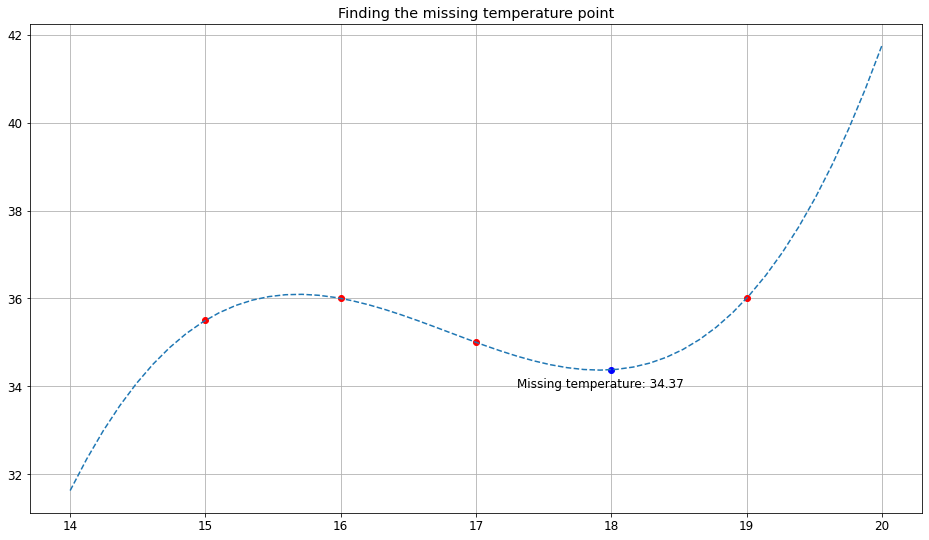

In [61]:
plt.rcParams.update({'font.size': 12})

x = [15, 16, 17, 19]
y = [35.5, 36, 35, 36]

p = interpolacao_polinomial(x, y)

t = np.linspace(14, 20, 50)
pt = np.polyval(p, t)

plt.figure(figsize=(16,9))
plt.title('Finding the missing temperature point')
plt.plot(x, y, 'ro')

missing_temperature = np.polyval(p, 18)

plt.plot(18, missing_temperature, 'bo')
plt.annotate(f'Missing temperature: {missing_temperature:.2f}', (18-0.7, missing_temperature-0.4))

plt.grid()
plt.plot(t, pt, '--');

Bem legal. Utilizando os pouquíssimos pontos que sabíamos conseguimos estimar o ponto faltante de forma aceitável! Perceba que resolvemos o problema corretamente pois a curva encontrada passa por todos os pontos dados.

Agora estudaremos outras maneiras de obter esse polinômio.

## Interpolação de Lagrange

A forma de Lagrange para o polinômio de interpolação $P_n(x)$ nos pontos $(x_0, y_0), \dots, (x_n, y_n)$ é dado por:

$$ P_n(x) = y_0l_0(x) + y_1l_1(x) + \dots + y_nl_n(x) = \sum_{k=0}^{n}y_kl_k(x) $$

Onde $l_k(x) \in \mathcal{P}_n $ são polinômios que dependem apenas de $x_0, \dots, n_n$.

Impondo novamente nossa condição de interpolação temos que:

$$ P_n(x) = y_0l_0(x_i) + y_1l_1(x_i) + \dots + y_il_i(x_i) + \dots + y_nl_n(x) = y_i$$

Dessa forma, temos a seguinte relação:

$$ l_k(x_i) = \delta_{ik} = \begin {cases}
1, \text{se i} = k\\
0, \text{se i} \neq k
\end{cases}
\Rightarrow \{x_0, \dots, x_{k-1}, x_{k+1}, \dots, x_n\} \text{ são raízes de } l_k$$

Podemos escrever $l_k$ como:
$$ l_k(x) = \alpha \prod_{i=0, i\neq k}^{n}(x - x_i) \Rightarrow
1 = l_k(x_k) = \alpha \prod_{i=0, i\neq k}^{n}(x_k - x_i) \implies l_k(x) = \prod_{i=0, i\neq k}^{n} \frac{x-x_i}{x_k-x_i}, k=0, \dots, n
$$





In [62]:
def interpolacao_lagrange(x, xi, yi):
    '''
    Realiza a interpolação de lagrange
    
    Params
        x: pontos para os quais se deseja encontrar y
        xi: coordenadas x dos pontos avaliados
        yi: coordenadas y dos pontos avaliados
    
    Retorno:
        coordenadas y encontradas para os pontos 
    '''
    
    xi = np.array(xi)
    yi = np.array(yi)
    
    n = len(xi)
    m = len(x)
    L = np.ones((n, m))

    for i in range(n):
        for j in range(n):
            if(i != j): 
                L[i, :] = (L[i, :] * (x - xi[j]))/(xi[i] - xi[j])

    y = yi.dot(L)
    return y

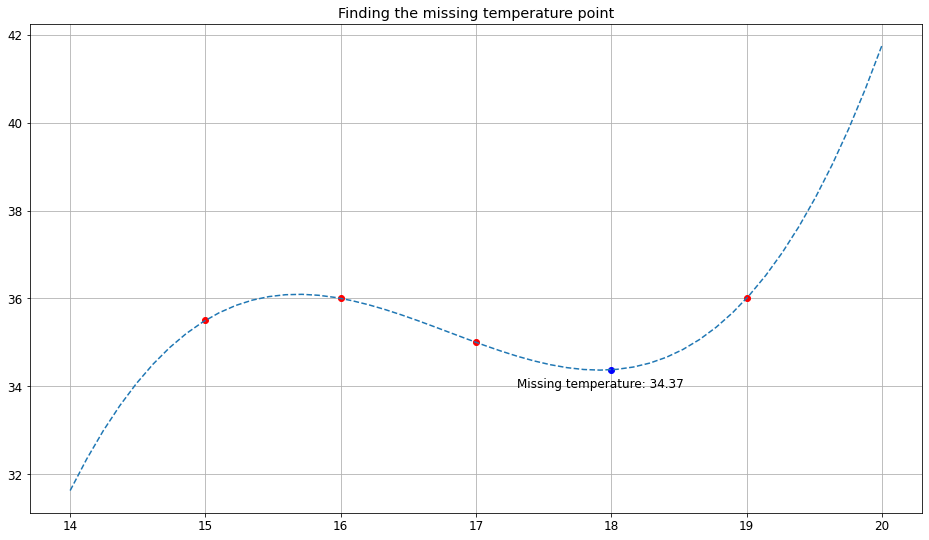

In [63]:
plt.rcParams.update({'font.size': 12})

x = [15, 16, 17, 19]
y = [35.5, 36, 35, 36]

t = np.linspace(14, 20, 50)
pt = interpolacao_lagrange(t, x, y)

plt.figure(figsize=(16,9))
plt.title('Finding the missing temperature point')
plt.plot(x, y, 'ro')

missing_temperature = np.polyval(p, 18)

plt.plot(18, missing_temperature, 'bo')
plt.annotate(f'Missing temperature: {missing_temperature:.2f}', (18-0.7, missing_temperature-0.4))

plt.grid()
plt.plot(t, pt, '--');

### Teorema da Existência e Unicidade

É interessante reparar que, devido ao Teorema da Existência e Unicidade, obtemos o mesmo polinômio.

### Que horas o ônibus passou nessa última quarta?

Vamos dar uma olhada em outro problema: Um ônibus passa 1 vez por dia em horários diferentes para cada dia da semana, conforme a tabela abaixo:

| dia         | seg    | ter  | qua  | qui  | sex  |
| :---------- | :----  | :--  | :--  | :--  | :--  |
| horário     | 12     | 13   | 14   |  14  | 16   |

Será que, dado um bom número de exemplos, nossa função consegue entender o padrão?

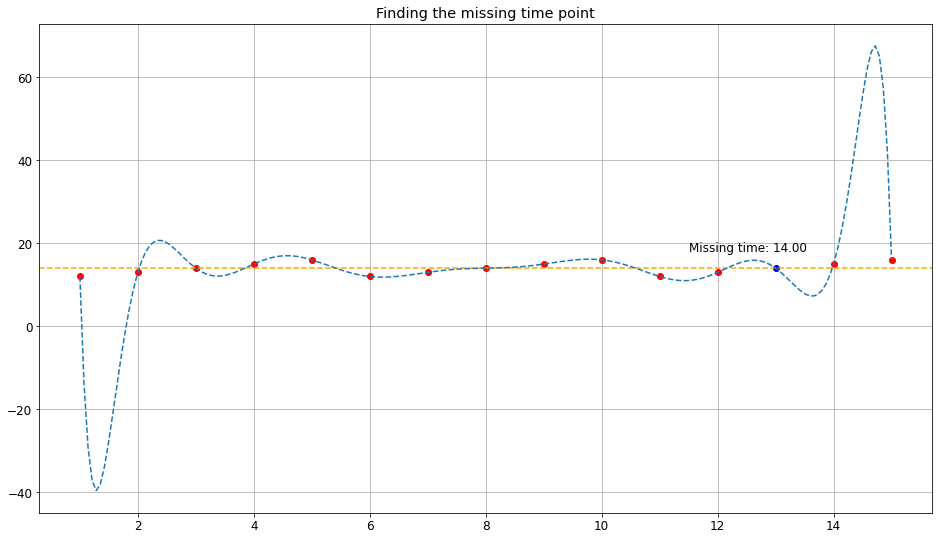

In [64]:
plt.rcParams.update({'font.size': 12})

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]
y = [12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 12, 13, 15, 16]

p = interpolacao_polinomial(x, y)

t = np.linspace(1, 15, 200)
pt = interpolacao_lagrange(t, x, y)

plt.figure(figsize=(16,9))
plt.title('Finding the missing time point')
plt.plot(x, y, 'ro')

missing_time = interpolacao_lagrange([13], x, y)[0]

plt.plot(13, missing_time, 'bo')
plt.annotate(f'Missing time: {missing_time:.2f}', (13-1.5, missing_time+4))

plt.grid()
plt.axhline(14, ls='--', color='orange')
plt.plot(t, pt, '--');

O valor foi preenchido corretamente! É bem interessante ver que o padrão foi percebido. No próximo método vamos analisar a capacidade do modelo de perceber um padrão linear.

Agora estudaremos um método com uma vantagem significativa sobre o método de Lagrange: ao adicionar um ponto novo não é necessário recalcular tudo.

## Interpolação de Newton

A forma de Newton para o polinômio de interpolação $P_n(x)$ nos pontos $(x_0, y_0), \dots, (x_n, y_n)$ é dado por:

$$ P_n(x) = \alpha_0 + \alpha_1(x-x_0) + \alpha_2(x-x_0)(x-x_1) + \dots + \alpha_n(x-x_0) \cdots (x-x_{n-1}) $$

Cada coeficiente $\alpha_k$ é determinado por uma diferença dividida de ordem $k$:

$$ f[x_i] := f(x_i), \quad i = 0, \dots, n $$

$$ f[x_i, x_{i+1}, \cdots, x_{i+k}] := \frac{f[x_{i+1}, x_{i+2}, \cdots, x_{i+k}] - f[x_i, x_{i+1}, \cdots, x_{i+k-1}]}{x_{i+k} - x_i}, \quad k=1, \dots, n \text{ e } i=0, \dots, n-k$$

In [65]:
def interpolacao_newton(x, xi, yi):
    '''
    Realiza a interpolação de Newton 
    '''
    xi = np.array(xi)
    yi = np.array(yi)
    
    n = np.size(xi)
    m = np.size(x)
    
    N = np.ones((n, m))
    
    D = np.zeros((n, n))
    D[: ,0] = yi
    
    for j in range(n-1):
        for i in range(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xi[i + j + 1] - xi[i])

    for i in range(1, n):
        N[i, :] = N[i - 1, :] * (x - xi[i - 1])
    
    y = D[0, :].dot(N)
    return y

### Quanto custa essa casa de 300m$^2$?

Nosso próxima teste será com um problema linear: o preço de uma casa dado seu tamanho.

Vamos lidar com dados reais sobre esse problema posteriormente. Por enquanto, vamos seguir com os seguintes dados fictícios:

| tamanho     | 100    | 200  | 300  | 400  | 500  |
| :---------- | :----  | :--  | :--  | :--  | :--  |
| preço       | 10     | 20   | 30   | 40   | 50   |


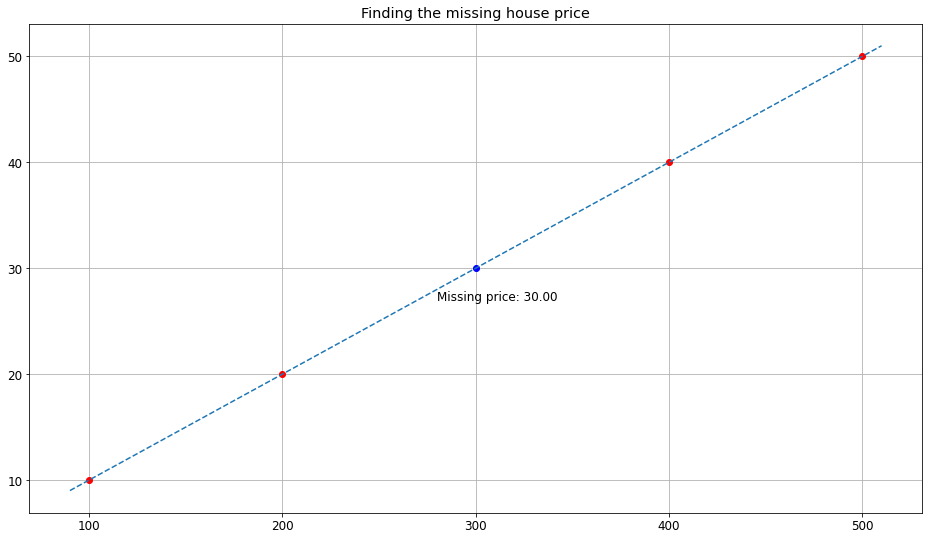

In [66]:
plt.rcParams.update({'font.size': 12})

x = [100, 200, 400, 500]
y = [10, 20, 40, 50]

p = interpolacao_polinomial(x, y)

t = np.linspace(90, 510, 1000)
pt = interpolacao_newton(t, x, y)

plt.figure(figsize=(16,9))
plt.title('Finding the missing house price')
plt.plot(x, y, 'ro')

missing_price = interpolacao_newton([300], x, y)[0]

plt.plot(300, missing_price, 'bo')
plt.annotate(f'Missing price: {missing_price:.2f}', (300-20, missing_price-3))

plt.grid()
plt.plot(t, pt, '--');

Como esperado - já que conseguimos entender relações ainda mais complexas com interpolação -, a linearidade foi encontrada.

## Erro na Interpolação

A pergunta que temos agora é: o quão bem nosso polinômio aproxima a função verdadeira? Para responder isso, estudaremos o teorema e os corolários que seguem.

**Teorema**: Sejam $f \in C^{n+1}([a, b]), a = x_0, x_1, \dots < x_n = b$ e $P_n(n)$ o polinômio de interpolação de $f(x)$ então

$$ E_n(x) = f(x) - P_n(x) = \frac{f^{n_1}(\xi)}{(n+1)!} \prod_{i=0}^{n}(x-x_i), \text{ onde } \xi = \xi (x) \in (a, b)$$

Como não sabemos muito sobre $\xi$, esse teorema não é computável. No entanto, entendendo os corolários abaixo conseguimos um *upper-bound* para esse erro.

**Corolário**:
- $ |E_n(x)|\leq \frac{1}{(n+1)!}\left \| f^{(n+1)} \right \|_\infty \prod_{n}^{i=0}|x-x_i| $
- $ \left \| E_n \right \|_\infty \leq \frac{1}{(n+1)!}\left \| f^{(n+1)} \right \|_\infty (b-a)^{n+1} $

**Corolário (distribuição uniforme de nós)**:

Dado $x_0$, se $x_{i+1} = x_i+h$  para $i=0, \dots, n-1$ com $h=\frac{b-a)}{n}$ então:

$$ \left \| E_n \right \|_\infty \leq \frac{h^{n+1}}{4(n+1)}\left \| f^{(n+1)} \right \|_\infty $$

### Fenômeno de Runge

**Conclusões**: 

- Não há garantias que $P_n$ converge para $f$ quando $n \rightarrow \infty$
- Interpolação polinomial de alta ordem é instável em uma distribuição uniforme de nós

**Soluções**:
- Utilizar distribuições não uniformes
- Fazer a interpolação polinomial por partes 

### Analisando o erro do Polinômio de Interpolação utilizando o MSE

Vamos analisar a mesma função de antes e tentar, utilizando alguns pontos, encontrar um polinômio de interpolação que se encaixe bem a função original:

$$f(x) = x^{2}+x^{3}\log\left(x+4\right)+3x$$

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
def f(x):
    return x**2 + x**3*np.log1p(x+4) + 3*x

def get_sample(x, y, sample_size=5):
    jump = x.shape[0]//sample_size
    x_ = x[::jump]
    y_ = y[::jump]
    return x_, y_

In [69]:
real_x = np.linspace(-4, 4, 200)
real_y = np.array([f(x) for x in real_x])

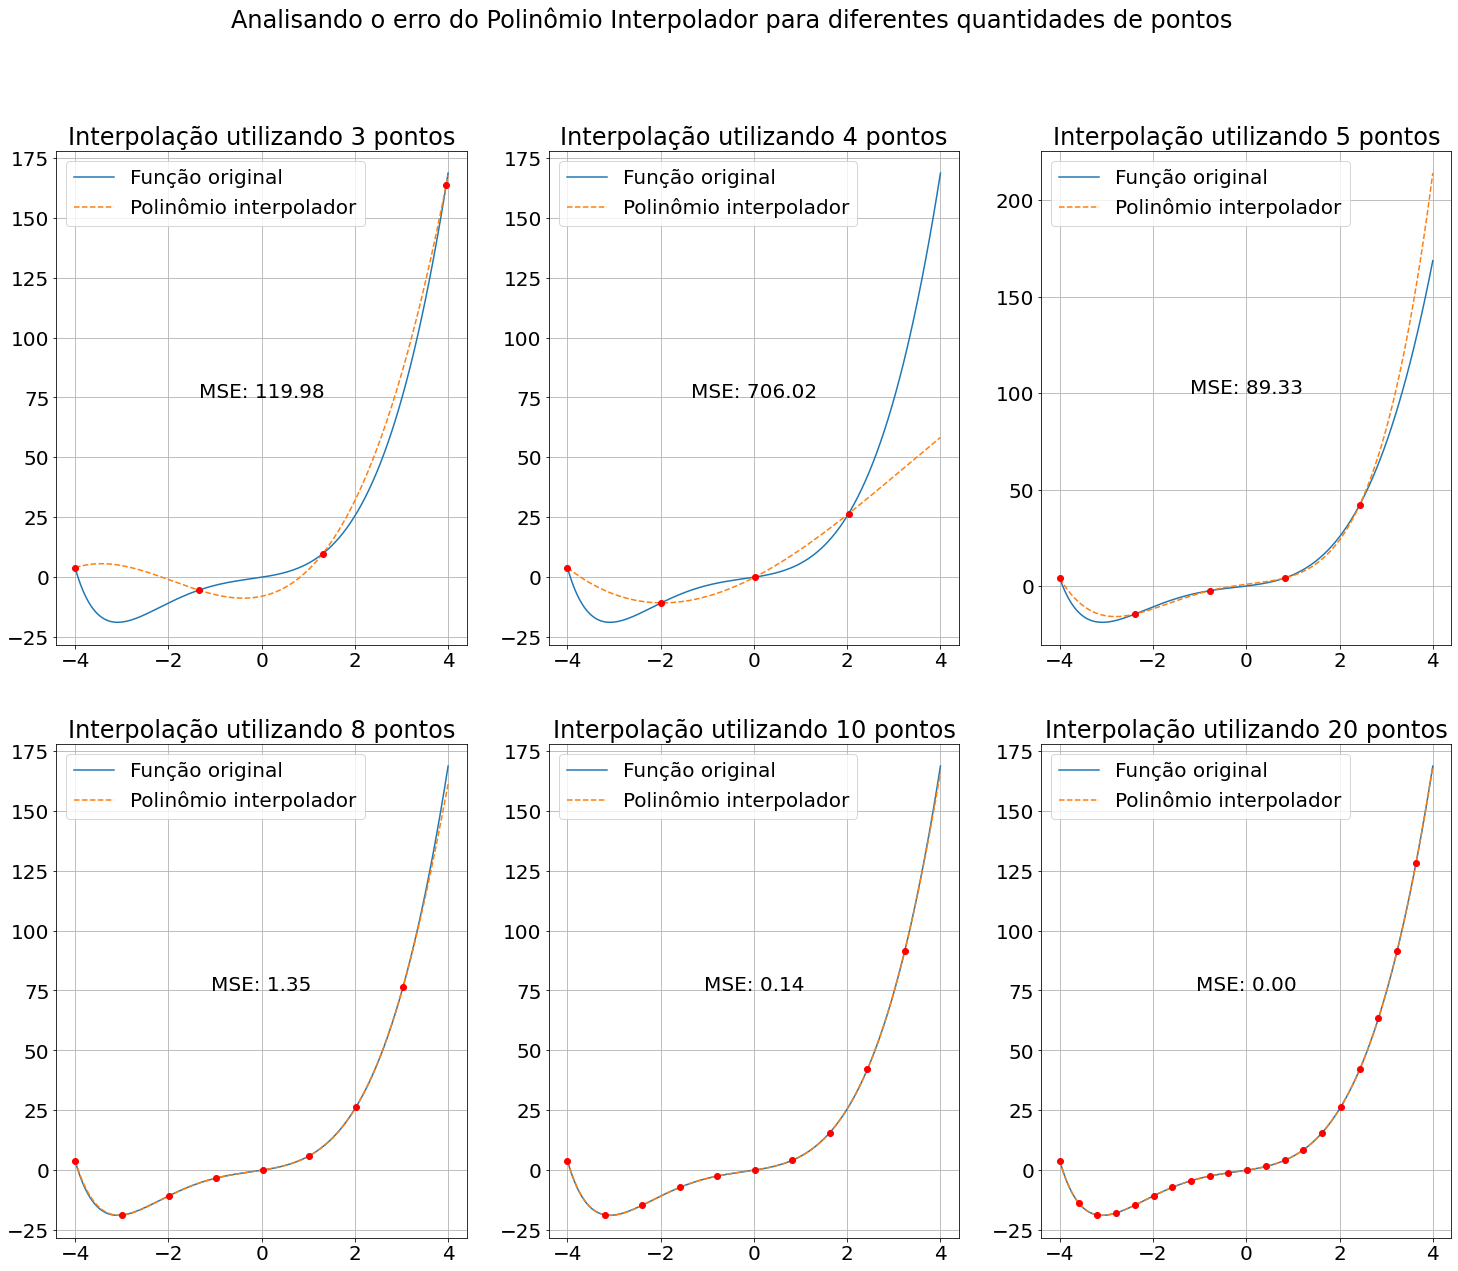

In [70]:
plt.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))
fig.suptitle('Analisando o erro do Polinômio Interpolador para diferentes quantidades de pontos')
sample_size_list = [3, 4, 5, 8, 10, 20]
idx = 0

for i in range(2):
    for j in range(3):
        sample_size = sample_size_list[idx]
        sample_x, sample_y = get_sample(real_x, real_y, sample_size)
        
        t = np.linspace(-4, 4, 200)
        pt = interpolacao_newton(t, sample_x, sample_y)
        
        mse = mean_squared_error(real_y, pt)
        
        if i == 0 and j == 2:
            axes[i, j].annotate(f'MSE: {mse:.2f}', xy=(0, 100), ha='center')
        else:
            axes[i, j].annotate(f'MSE: {mse:.2f}', xy=(0, 75), ha='center')
        
        axes[i, j].plot(real_x, real_y, '-', label='Função original')
        axes[i, j].plot(t, pt, '--', label='Polinômio interpolador')
        axes[i, j].plot(sample_x, sample_y, 'o', color='red')
        
        title = f'Interpolação utilizando {sample_size} pontos'
        axes[i, j].set_title(title)
        axes[i, j].grid()
        axes[i, j].legend()
        
        idx += 1

## Splines

Pensando em formas de se reduzir o erro, surgiu a ideia de separar a curva em partes antes de interpolar. Essa ideia deu origem a Splines.

Por exemplo, separamos os pontos em vários grupos contendo poucos pontos e então interpolamos cada grupo separadamente. No fim das contas, teremos várias interpolações de baixo grau para cada grupo que, quando "coladas", representarão bem a função original.

Nesse notebook implementaremos apenas as splines lineares, no entanto, é importante saber que as splines cúbicas são as mais importantes e utilizadas de forma geral.

Dados $(n+1)$ pontos $(x_0, y_0), \dots, (x_n, y_n)$ com $a=x_0 < \cdots < x_n = b$. Uma função $S_k(x)$ é chaamda de Spline de grau $k$ se satisfaz:

- $S_{k, i} = S_k|_{x_i, x_{i+1}}$ com $i = 0, \dots, n-1$ é um polinômio de grau $k$
- $S_k \in C^{k-1} ([a, b])$
- $S_k(x_i) = y_i$, com i = 0, $\dots, n$

In [71]:
import math
from scipy.interpolate import lagrange, CubicSpline, interp1d

def get_spline(i, x_cur):
        return y[i] * (x[i+1] - x_cur)/(x[i+1] - x[i]) + y[i+1] * (x_cur - x[i])/(x[i+1] - x[i])

def spline_linear(x, y, x_val):
    '''
    Calcula a spline linear e estima valores para cada ponto x_val
    
    Params:
        x: coordenadas x dos pontos avaliados
        y: coordenadas y dos pontos avaliados
        x_val: pontos para os quais se deseja encontrar y
    
    Retorno:
        coordenadas y encontradas para o ponto
    '''
    
    n = x.shape[0]
    k = x_val.shape[0]
    y_val = np.zeros(k)

    if x_val[0] < x[0] or x_val[-1] > x[-1]:
        return -1

    i = 0
    for j in range(k):
        if i+1 < n and x_val[j] > x[i+1]:
            i += 1
        y_val[j] = get_spline(i, x_val[j])
    
    return y_val

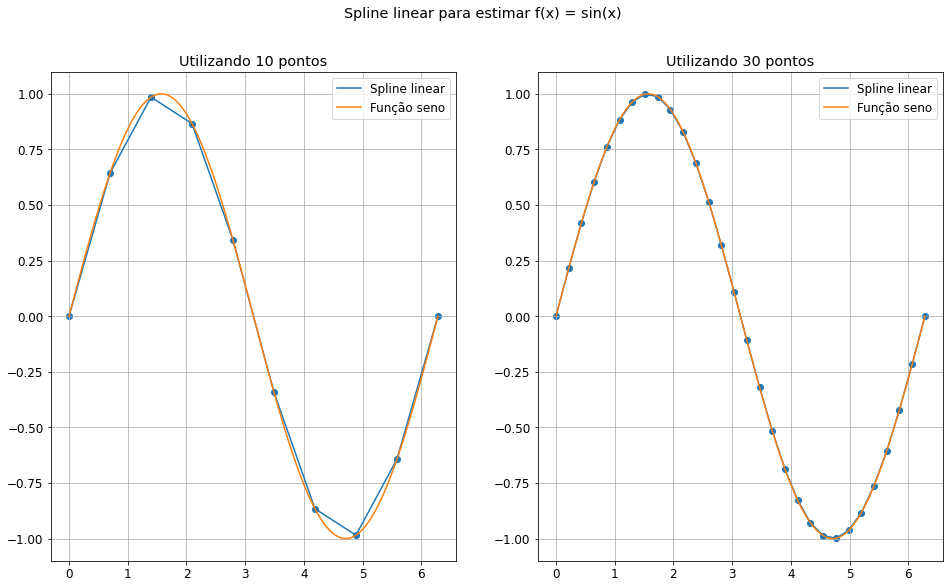

In [72]:
plt.rcParams.update({'font.size': 12})

a, b = 0, 2 * math.pi

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
fig.suptitle('Spline linear para estimar f(x) = sin(x)')
points_amt_list = [10, 30]
idx = 0

for i in range(1):
    for j in range(2):
        
        points_amt = points_amt_list[idx]

        x = np.linspace(a, b, points_amt)
        y = np.array([math.sin(xi) for xi in x]).astype('float64')
        x_val = np.linspace(a, b, 100)
        y_val = spline_linear(x, y, x_val)

        axes[j].set_title(f'Utilizando {points_amt} pontos')
        axes[j].plot(x_val, y_val, label='Spline linear')
        axes[j].plot(x_val, [math.sin(xi) for xi in x_val], label='Função seno')
        axes[j].scatter(x, y)
        axes[j].legend()
        axes[j].grid()
        
        idx +=1

## Aplicação: explicando overfitting em Machine Learning

A aplicação de interpolação nesse notebook terá fins educativos. Vamos, utilizando dados reais, estudar algumas especificidades do treino de modelos.

Vamos analisar um conjunto de dados reais com os preços de casas em Boston. Nosso objetivo é conseguir fazer um modelo simples que consiga estimar preço de casas que ele nunca viu antes.

### Lendo nosso dados

In [73]:
import pandas as pd
import seaborn as sns

from scipy.interpolate import lagrange, CubicSpline, interp1d

In [74]:
df = pd.read_csv('data/train.csv')
df = df[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'SalePrice']].copy()

Nosso dataset possui 81 features, mas vamos selecionar apenas algumas delas para dar uma olhada. Queremos escolher apenas uma feature - em especial, uma que possua uma relação linear com o preço da casa -, para que possamos visualizar nossos modelos com um simples gráfico de duas dimensões.

Abaixo, vamos olhar a relação das features escolhidas dois a dois.

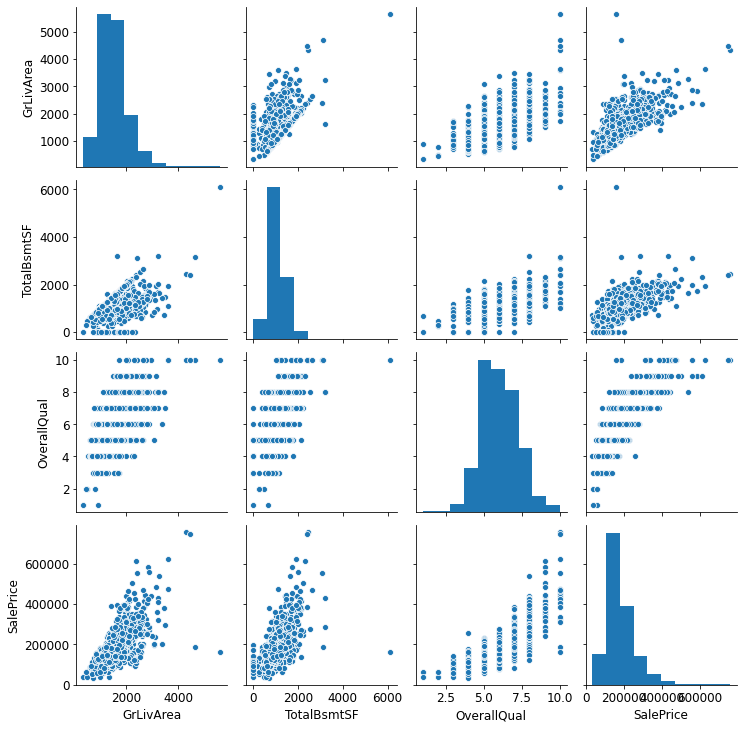

In [75]:
sns.pairplot(df);

Na última linha é possível observar a relação de todas as features com o Preço (valor que queremos prever). Como dissemos anteriormente, vamos escolher a característica com a relação linear mais clara dentre essas: GrLivArea, que é o tamanho da área acima do chão em que se pode viver (não contabiliza a área do porão).

Vamos manter, então, apenas essa feature e o preço, o qual passeremos a nos referir como Target.

In [76]:
df = df[['GrLivArea', 'SalePrice']].copy()
df = df[df['GrLivArea'] < 3000].copy()

Removemos as casas com mais de 3000m^2 de GrLivArea pelo fato de serem muito diferentes das outras casas.

## Treino e validação

Vamos separar nossos dados em dois conjuntos:

1. Treino: esse conjunto será usado para treinar nossos modelos. Ele contém instâncias dos dados (casas) juntamente com seu respectivo preço de venda. Dessa forma, nosso modelo pode começar a entender a relação do preço com o tamanho da casa.

2. Validação: nós sabemos o preço das casas desse conjunto, mas nosso modelo não. Nele, nosso modelo terá a chance de testar o que conseguiu aprender sobre os dados - e poderemos avaliar esse aprendizado comparando seus resultados com os resultados reais.

In [77]:
from sklearn.model_selection import train_test_split

# garantindo que teremos apenas um y relacionado a um x
df = df.drop_duplicates(subset=['GrLivArea'])

# ordenando os valores de x
df = df.sort_values('GrLivArea', ascending=True)

In [78]:
X_train, X_test = train_test_split(df, test_size=0.30, shuffle=True, random_state=42)

In [79]:
X_train = X_train.sort_values('GrLivArea')
y_train = X_train['SalePrice']
X_train = X_train.drop(['SalePrice'], axis=1)

X_test = X_test.sort_values('GrLivArea')
y_test = X_test['SalePrice']
X_test = X_test.drop(['SalePrice'], axis=1)

In [80]:
print(f'Dimensões do conjunto de treino: {X_train.shape}')
print(f'Dimensões do conjunto de validação: {X_test.shape}')

Dimensões do conjunto de treino: (590, 1)
Dimensões do conjunto de validação: (253, 1)


Vamos dar uma olhada no nosso conjunto de treino

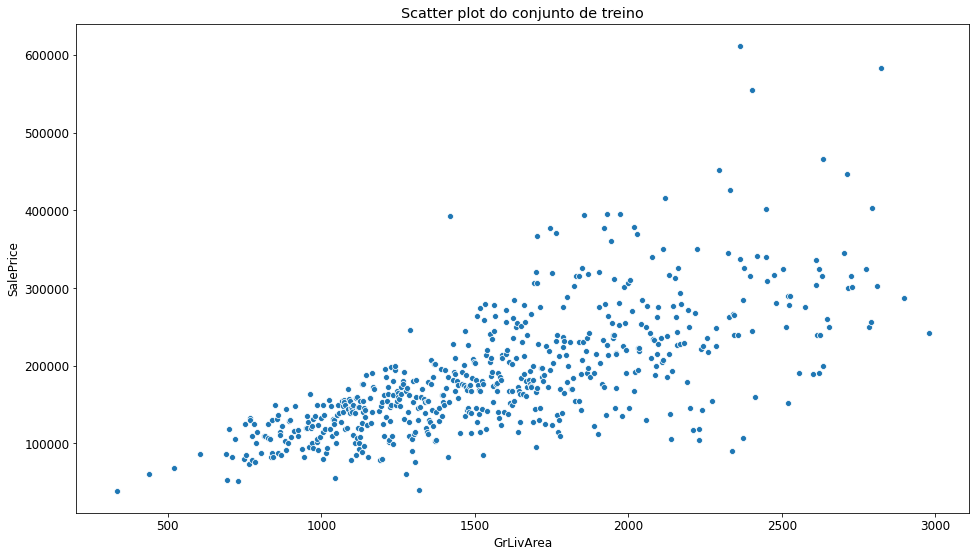

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

axes.set_title('Scatter plot do conjunto de treino')
sns.scatterplot(ax=axes, x=X_train['GrLivArea'], y=y_train)

plt.show()

Como queríamos, é notável a forte relação linear entre GrLivArea e o preço da casa. Portanto, o primeiro modelo que vamos utilizar é uma Regressão Linear

### Regressão Linear

A regressão linear, de forma simplificada, vai tentar encaixar a melhor reta aos nossos dados.

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regression_preds = regressor.predict(X_test)

In [84]:
regression_df = X_test.copy()

regression_df['PredictedSalePrice'] = regression_preds
regression_df['SalePrice'] = y_test.values

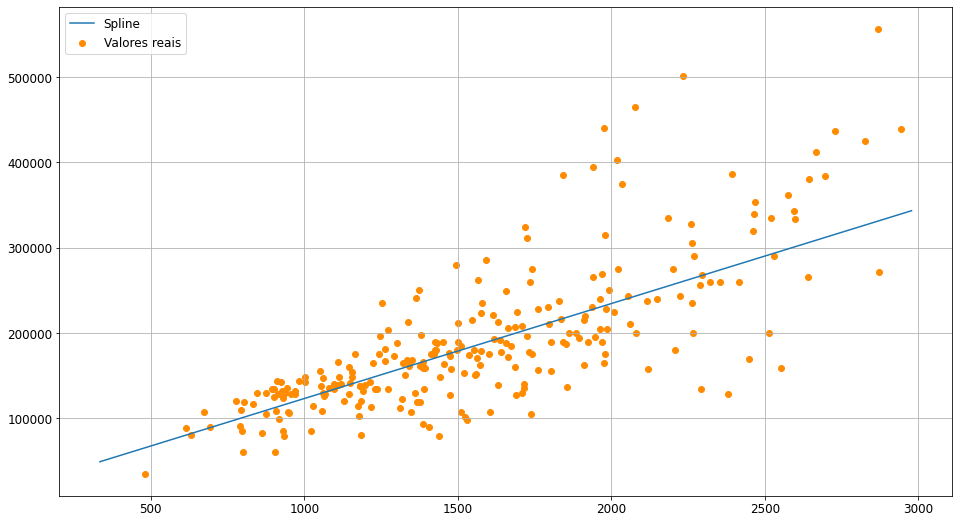

In [85]:
x_min = df['GrLivArea'].min()
x_max = df['GrLivArea'].max()
x_range = x_max - x_min + 1

x_val = np.linspace(x_min, x_max, x_range)

plt.figure(figsize=(16,9))
plt.plot(x_val, regressor.predict(x_val.reshape(-1, 1)), label='Spline')
plt.scatter(regression_df['GrLivArea'], regression_df['SalePrice'], color='darkorange', label='Valores reais')

plt.legend()
plt.grid()
plt.show()

In [86]:
regression_mse = np.sqrt(mean_squared_error(regression_df['SalePrice'], regression_df['PredictedSalePrice']))
print(f'RMSE = {regression_mse:.2f}')

RMSE = 56079.14


Como esperado, nossa Regressão Linear encaixou uma reta que minimiza a soma da distância dos pontos até ela. Avaliamos os resultados com nosso conjunto de teste e obtivemos o seguinte resultado:

$$RMSE = 56079.14$$

Mas, como vocês podem ver, parece que uma reta não é o suficiente para entender todo esse comportamento. E se nós criássemos um modelo que passa por todos os pontos do nosso conjunto de treino? Será que ele vai performar melhor no teste?

### Utilizando Splines para prever o preço

Utilizando as técnicas de Interpolação que estudamos nesse notebook, podemos fazer um modelo que passa por todos os pontos do conjunto de teste

In [87]:
# nós de interpolação
x = X_train['GrLivArea'].values
y = y_train.values

# criando spline e fittando ao nosso conjunto de treino
spline = CubicSpline(x, y)

# definindo os limites dos nossos x
x_min = df['GrLivArea'].min()
x_max = df['GrLivArea'].max()
x_range = x_max - x_min + 1

# utilizando a spline criada, prevemos o valor para cada x possivel
x_val = np.linspace(x_min, x_max, x_range)
y_val = np.abs(spline(x_val)) # ajudando spline já que preço deve ser >= 0

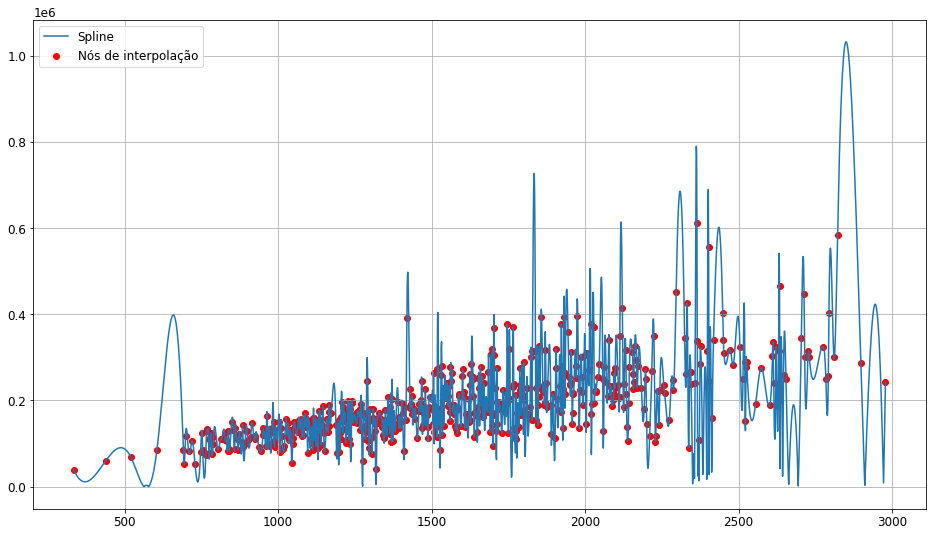

In [88]:
plt.figure(figsize=(16,9))

plt.plot(x_val, y_val, label='Spline')
plt.scatter(x, y, color='red', label='Nós de interpolação')
plt.legend()
plt.grid()

plt.show()

Conseguimos! A curva azul acima é como nosso polinômio interpolador e passa corretamente por todos os pontos que tínhamos disponíveis.

Agora vamos utilizar o modelo que criamos no conjunto de teste:

In [89]:
spline_df = pd.DataFrame()
spline_df['GrLivArea'] = x_val
spline_df['PredictedSalePrice'] = y_val

spline_df = spline_df[spline_df['GrLivArea'].isin(X_test['GrLivArea'])]
spline_df['SalePrice'] = y_test.values

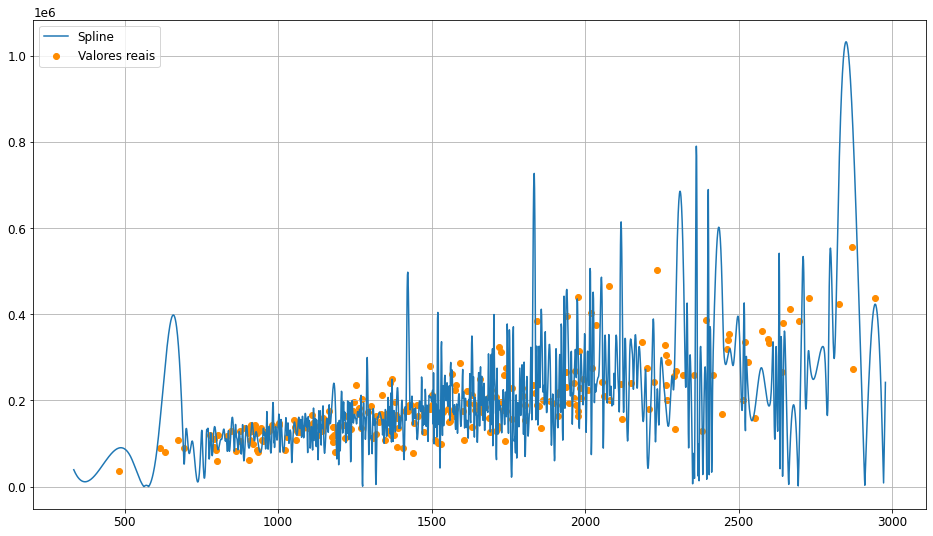

In [90]:
plt.figure(figsize=(16,9))
plt.plot(x_val, y_val, label='Spline')
plt.scatter(spline_df['GrLivArea'], spline_df['SalePrice'], color='darkorange', label='Valores reais')

plt.legend()
plt.grid()
plt.show()

In [91]:
spline_mse = np.sqrt(mean_squared_error(spline_df['SalePrice'], spline_df['PredictedSalePrice']))
print(f'RMSE = {spline_mse:.2f}')

RMSE = 116450.40


Como esperado, o resultado foi muito pior. Dessa vez, os pontos laranja representam nosso conjunto de teste e a curva azul é nossa Spline. Com isso, conseguimos um erro de:

$$RMSE = 116450.40$$

Mas, se nosso modelo se encaixa muito melhor aos nossos dados de treino, por que isso ocorre?

### Overfitting (ou Sobreajuste)

Overfitting é um termo utilizado para descrever quando um modelo se ajusta muito bem ao conjunto de dados anterioremente observado - em nosso caso, o conjunto de treino -, mas falha ao prever novos resultados.

Esse foi exatamente o fenômeno que aconteceu aqui. Uma Spline se ajusta completamente aos dados previamente observados, no entanto, quando apresentada a novos exemplos demonstra resultados muito inferiores aos de uma simples regressão linear em uma única variável.

Um modelo overfittado se ajustou aos ruídos dos dados e, por isso, falha ao prever valores para novas ocorrências.